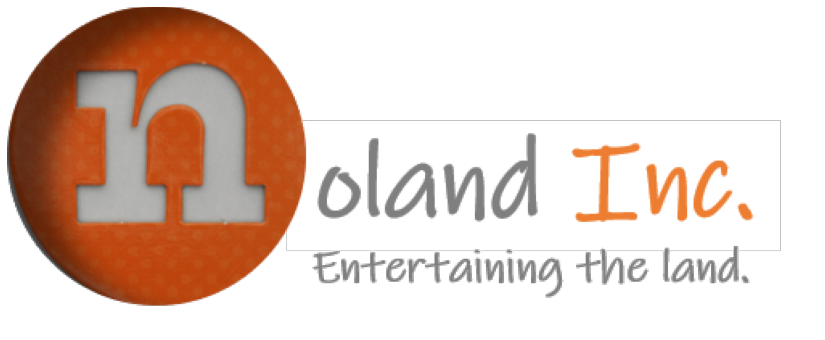

In [185]:
import matplotlib.pyplot as plt
img=plt.imread('Logo Noland Inc..png')
plt.axis('off')
plt.imshow(img)
plt.show()

## Import Libraries ##

In [186]:
import numpy as np
import pandas as pd
import scipy

import seaborn as sns
sns.set()

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter
%matplotlib inline
mpl.rcParams['figure.figsize'] = (20,5)
plt.style.use('ggplot')

from sklearn.preprocessing import StandardScaler

from sklearn.cluster import KMeans

from scipy.cluster.hierarchy import dendrogram,linkage

from sklearn.decomposition import PCA #to help implement the dimensional reduction


## Import data ##

In [187]:
dataset=pd.ExcelFile('Noland Inc.  Sales dataset.xlsx') 
dataset=dataset.parse('My  Sales dataset',index_col=0)
dataset.head()

,QUANTITY\nORDERED,PRICEEACH,ORDERLINE\nNUMBER,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCT\nCODE,CUSTOMERNAME,PHONE,ADDRESSLINE1,ADDRESSLINE2,CITY,STATE,POSTALCODE,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDER NUMBER,,,,,,,,,,,,,,,,,,,,,,,,
10107,30,95.70,2,2871.00,2018-02-24,Shipped,1,2,2018,Motorcycles,95,S10_1678,Land of Toys Inc.,2125557818,897 Long Airport Avenue,NaN,NYC,NY,10022,USA,N.Amer,Yu,Kwai,Small
10121,34,81.35,5,2765.90,2018-05-07,Shipped,2,5,2018,Motorcycles,95,S10_1678,Reims Collectables,26.47.1555,59 rue de l'Abbaye,NaN,Reims,NaN,51100,France,EMEA,Henriot,Paul,Small
10134,41,94.74,2,3884.34,2018-07-01,Shipped,3,7,2018,Motorcycles,95,S10_1678,Lyon Souveniers,+33 1 46 62 7555,27 rue du Colonel Pierre Avia,NaN,Paris,NaN,75508,France,EMEA,Da Cunha,Daniel,Medium
10145,45,83.26,6,3746.70,2018-08-25,Shipped,3,8,2018,Motorcycles,95,S10_1678,Toys4GrownUps.com,6265557265,78934 Hillside Dr.,NaN,Pasadena,CA,90003,USA,N.Amer,Young,Julie,Medium
10159,49,100.00,14,4900.00,2018-10-10,Shipped,4,10,2018,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,6505551386,7734 Strong St.,NaN,San Francisco,CA,NaN,USA,N.Amer,Brown,Julie,Medium


In [188]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2823 entries, 10107 to 10414
Data columns (total 24 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   QUANTITY
ORDERED  2823 non-null   int64         
 1   PRICEEACH         2823 non-null   float64       
 2   ORDERLINE
NUMBER  2823 non-null   int64         
 3   SALES             2823 non-null   float64       
 4   ORDERDATE         2823 non-null   datetime64[ns]
 5   STATUS            2823 non-null   object        
 6   QTR_ID            2823 non-null   int64         
 7   MONTH_ID          2823 non-null   int64         
 8   YEAR_ID           2823 non-null   int64         
 9   PRODUCTLINE       2823 non-null   object        
 10  MSRP              2823 non-null   int64         
 11  PRODUCT
CODE      2823 non-null   object        
 12  CUSTOMERNAME      2823 non-null   object        
 13  PHONE             2823 non-null   object        
 14  ADDRESSLINE1      2

***Let's check for null values***

In [189]:
dataset.isnull().sum()

QUANTITY\nORDERED       0
PRICEEACH               0
ORDERLINE\nNUMBER       0
SALES                   0
ORDERDATE               0
STATUS                  0
QTR_ID                  0
MONTH_ID                0
YEAR_ID                 0
PRODUCTLINE             0
MSRP                    0
PRODUCT\nCODE           0
CUSTOMERNAME            0
PHONE                   0
ADDRESSLINE1            0
ADDRESSLINE2         2521
CITY                    0
STATE                1486
POSTALCODE             76
COUNTRY                 0
TERRITORY               0
CONTACTLASTNAME         0
CONTACTFIRSTNAME        0
DEALSIZE                0
dtype: int64

**Let's drop some columns for better exploration.**

In [190]:
dropped_col=['ADDRESSLINE1', 'ADDRESSLINE2', 'POSTALCODE', 'CITY', 'PHONE', 'STATE', 'ORDERLINE\nNUMBER']
dataset=dataset.drop(dropped_col,axis=1)
dataset.head()

,QUANTITY\nORDERED,PRICEEACH,SALES,ORDERDATE,STATUS,QTR_ID,MONTH_ID,YEAR_ID,PRODUCTLINE,MSRP,PRODUCT\nCODE,CUSTOMERNAME,COUNTRY,TERRITORY,CONTACTLASTNAME,CONTACTFIRSTNAME,DEALSIZE
ORDER NUMBER,,,,,,,,,,,,,,,,,
10107,30,95.70,2871.00,2018-02-24,Shipped,1,2,2018,Motorcycles,95,S10_1678,Land of Toys Inc.,USA,N.Amer,Yu,Kwai,Small
10121,34,81.35,2765.90,2018-05-07,Shipped,2,5,2018,Motorcycles,95,S10_1678,Reims Collectables,France,EMEA,Henriot,Paul,Small
10134,41,94.74,3884.34,2018-07-01,Shipped,3,7,2018,Motorcycles,95,S10_1678,Lyon Souveniers,France,EMEA,Da Cunha,Daniel,Medium
10145,45,83.26,3746.70,2018-08-25,Shipped,3,8,2018,Motorcycles,95,S10_1678,Toys4GrownUps.com,USA,N.Amer,Young,Julie,Medium
10159,49,100.00,4900.00,2018-10-10,Shipped,4,10,2018,Motorcycles,95,S10_1678,Corporate Gift Ideas Co.,USA,N.Amer,Brown,Julie,Medium


In [191]:
dataset.isnull().sum().sum()


0

**Explore dataset**

In [192]:
dataset.describe()

,QUANTITY\nORDERED,PRICEEACH,SALES,QTR_ID,MONTH_ID,YEAR_ID,MSRP
count,2823.000000,2823.000000,2823.000000,2823.000000,2823.000000,2823.00000,2823.000000
mean,35.092809,83.658544,2936.906408,2.717676,7.092455,2018.81509,100.715551
std,9.741443,20.174277,1105.644284,1.203878,3.656633,0.69967,40.187912
min,6.000000,26.880000,482.130000,1.000000,1.000000,2018.00000,33.000000
25%,27.000000,68.860000,2100.000000,2.000000,4.000000,2018.00000,68.000000
50%,35.000000,95.700000,2800.000000,3.000000,8.000000,2019.00000,99.000000
75%,43.000000,100.000000,3726.810000,4.000000,11.000000,2019.00000,124.000000
max,97.000000,100.000000,9048.160000,4.000000,12.000000,2020.00000,214.000000


In [193]:
rows,columns=dataset.shape
print(rows,'rows and ',columns ,'columns')

2823 rows and  17 columns


**Define correlation**

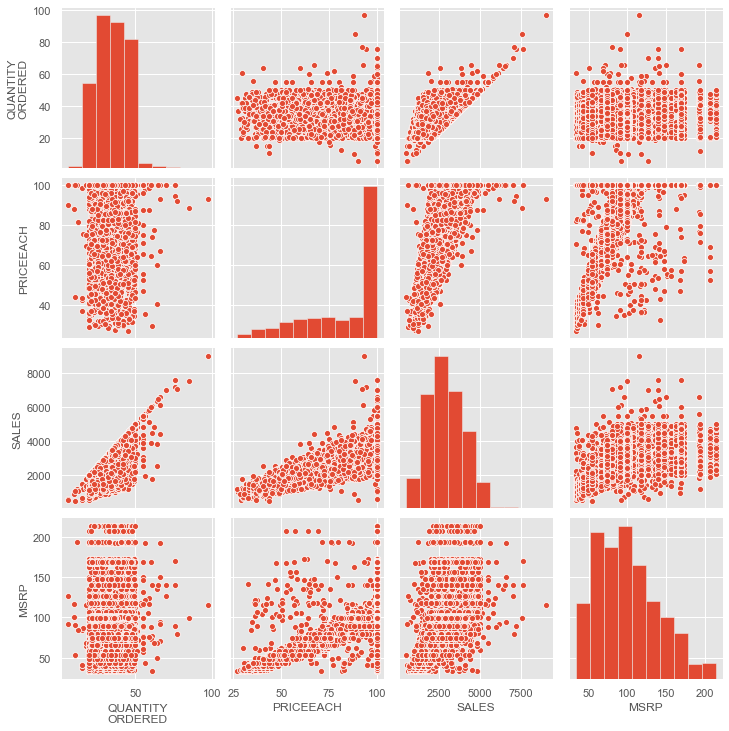

In [194]:
sns.pairplot(dataset.drop(['MONTH_ID','QTR_ID','YEAR_ID'],axis=1))
plt.show()

**Plot correlation**

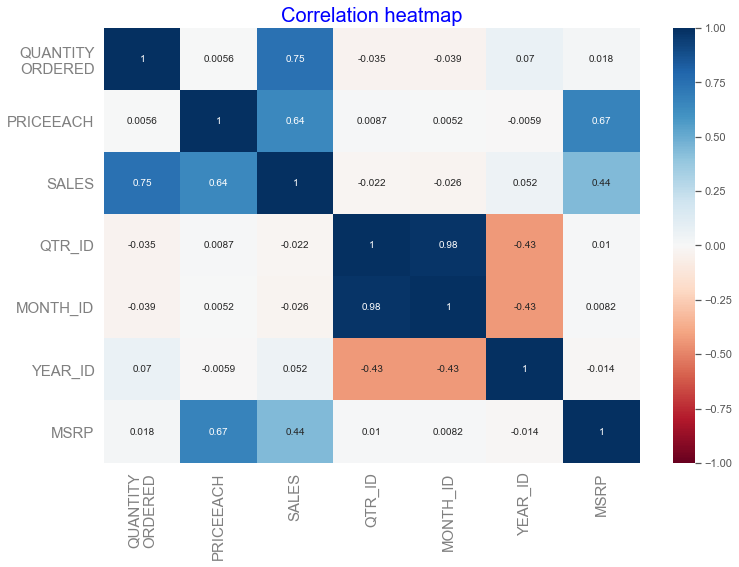

In [195]:
plt.figure(figsize=(12,8))
heatmap=sns.heatmap(dataset.corr(),annot=True,cmap='RdBu',vmin= -1,vmax=1)
plt.title('Correlation heatmap',color='blue', fontsize=20)
heatmap.set_xticklabels(heatmap.get_xticklabels(),color='grey',rotation=90, fontsize=15)
heatmap.set_yticklabels(heatmap.get_yticklabels(),color='grey',rotation=0, fontsize=15)
plt.show()

**There is a relatively strong positive correlation between price and Sales, showing the elasticity feature of products' demand.
We could also say before further analysis that Noland Inc doesn't go above MSRP and this could be a good indicator for the company.**

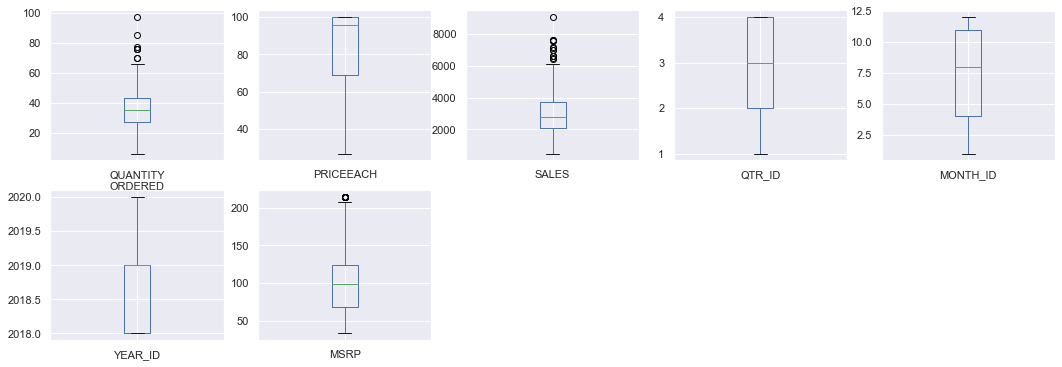

In [196]:
sns.set()
plt.rcParams['figure.figsize'] = [18, 16]
dataset.plot(kind='box',subplots=True,layout=(5,5), sharex=False, sharey=False)
plt.tight_layout
plt.show()

**This shows that:**
    
 . Quantity ordered are concentrated around a range of 25 to 45 and outliers could be observed;
 
 . Product price varies from 70 to 100 and MSRP varies from 70 to 125 with few outliers on MSRP;
 
 . More sales occurs from the 2nd to the 4th quarter. Most sales have been recorded in 2018 and 2019, further analysis will        help to understand the data structure of years after as the year median is aligned on the 3rd quartile of year_id (let's check this out in the next cell)
 
 . Sales and quantity ordered are the fields where we observe the presence of outliers. Outliers is also observed on MSRP and      this could be relevant to explain a potential customers churn.

In [197]:
dataset.groupby(['YEAR_ID'])['MONTH_ID'].nunique()

YEAR_ID
2018    12
2019    12
2020     5
Name: MONTH_ID, dtype: int64

**Effectively, we just have a part of 2020 data, this should be taken into account for better analysis.**

## Let's explore some KPI's ##

**SALES**

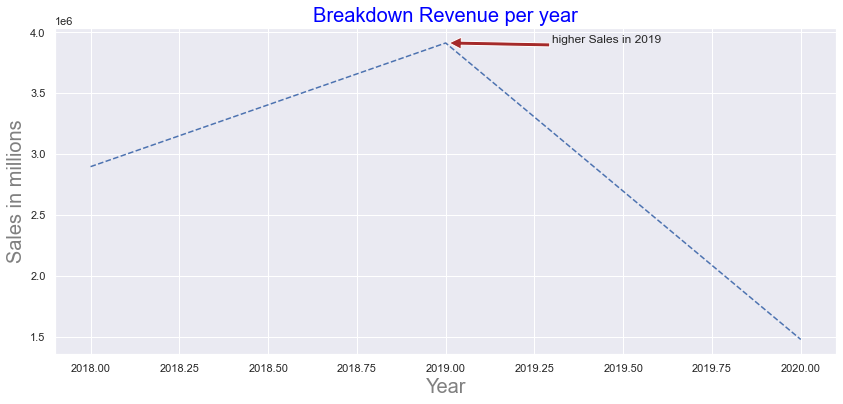

YEAR_ID
2018    2898149.94
2019    3913700.87
2020    1479035.98
Name: SALES, dtype: float64

In [198]:
plt.rcParams['figure.figsize'] = [14, 6]
revenue=dataset.groupby(['YEAR_ID'])['SALES'].sum()
revenue.plot(color='b',linestyle='--')
plt.xlabel('Year',fontsize=20,color='grey')
plt.ylabel('Sales in millions', fontsize=20,color='grey')
plt.title('Breakdown Revenue per year',fontsize=20, color='Blue')
plt.annotate('higher Sales in 2019', xy=(2019.01,3913700.87),xytext=(2019.00+0.3,3913700.87),arrowprops=dict(facecolor='brown'))
plt.show()
revenue

***Sales per month***


*November shows higher revenues no matter the year, and a drastic drop is observed in december*

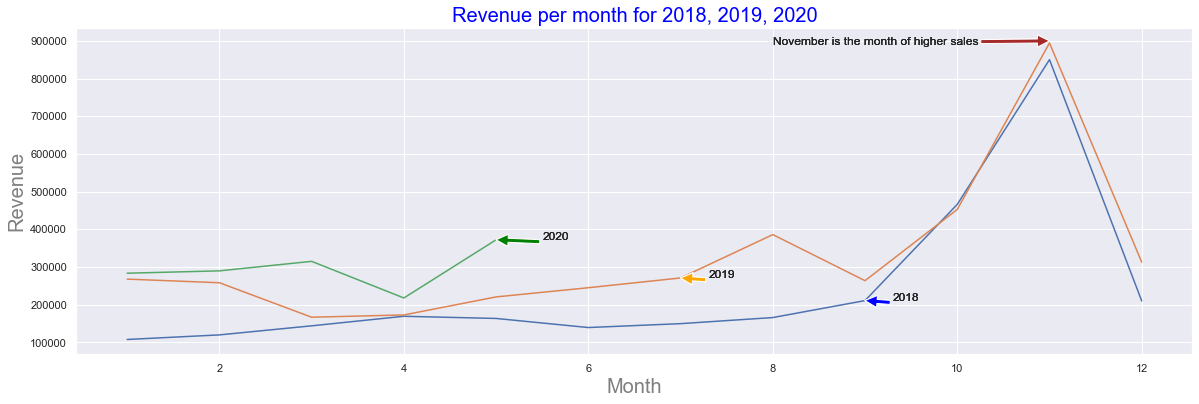

In [199]:
plt.rcParams['figure.figsize'] = [20, 6]
a=[2018,2019,2020]
for x in a:
    dataset[dataset.YEAR_ID==x].groupby(['MONTH_ID'])['SALES'].sum().plot()
    plt.xlabel('Month', fontsize=20,color='grey')
    plt.ylabel('Revenue', fontsize=20,color='grey')
    plt.title('Revenue per month for 2018, 2019, 2020', fontsize=20, color='blue')
    plt.annotate('November is the month of higher sales', xy=(11,900000),xytext=(11-3,890000),arrowprops=dict(facecolor='brown'))
    plt.annotate('2018', xy=(9,211045.86),xytext=(9+0.3,211045.86),arrowprops=dict(facecolor='blue'))
    plt.annotate('2019', xy=(7,271103.61),xytext=(7+0.3,271103.50),arrowprops=dict(facecolor='orange'))
    plt.annotate('2020', xy=(5,372343.65),xytext=(5+0.5,372343.65),arrowprops=dict(facecolor='green'))
plt.show()

***2020 in on the good shape, sales scale up and this could be observed whatever the month.
There is a growth of sales that starts on September and spike on November, but drop drastically on December. On a holistic prospective, sales are growing from year to year, at least within 2018 and 2019 and are likely to follow the trend in 2020.***

In [200]:
a=[2018,2019,2020]
for x in a:
    print(x,dataset[dataset.YEAR_ID==x].groupby(['MONTH_ID'])['SALES'].sum())

2018 MONTH_ID
1     107885.96
2     120036.80
3     144096.23
4     169421.03
5     163654.12
6     139552.84
7     149869.73
8     166026.32
9     211045.86
10    466240.57
11    850203.27
12    210117.21
Name: SALES, dtype: float64
2019 MONTH_ID
1     268015.87
2     258389.05
3     166958.56
4     172935.80
5     220815.14
6     245190.75
7     271103.61
8     386106.59
9     263854.26
10    452796.13
11    894479.18
12    313055.93
Name: SALES, dtype: float64
2020 MONTH_ID
1    283680.46
2    289902.30
3    315131.94
4    217977.63
5    372343.65
Name: SALES, dtype: float64


**How orders and customers' complaints are managed?**

Shipped       0.927028
Cancelled     0.021254
Resolved      0.016649
On Hold       0.015586
In Process    0.014524
Disputed      0.004959
Name: STATUS, dtype: float64


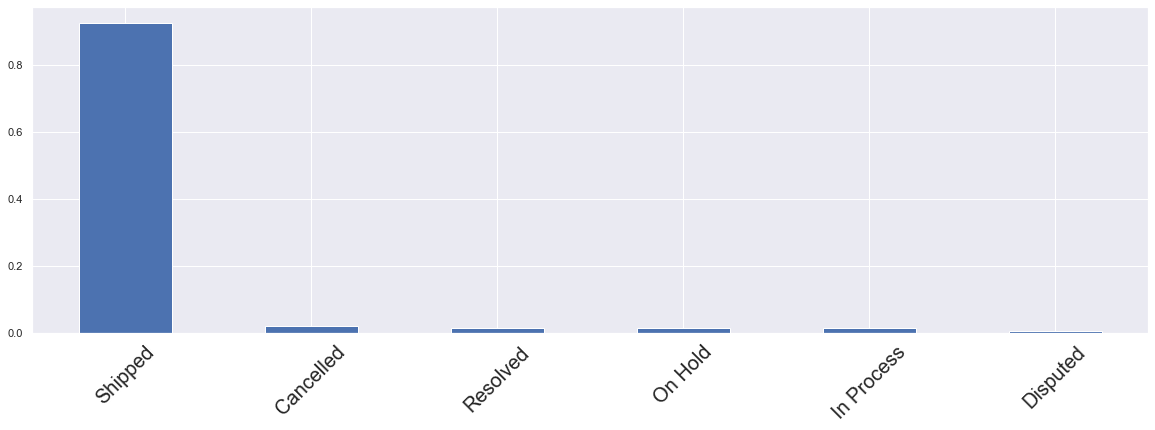

In [201]:
dataset['STATUS'].value_counts(normalize=True).plot(kind='bar')
plt.xticks(rotation=45, fontsize=20)
print(dataset['STATUS'].value_counts(normalize=True))

***2% of orders are cancelled, 1.5% on hold or in process and it's observed that 0.4% is disputed. Deeper analysis will help
to find out if we're doing good or no, even if actual scores deem to spot the company on a good position.***

**Dealsize distribution**

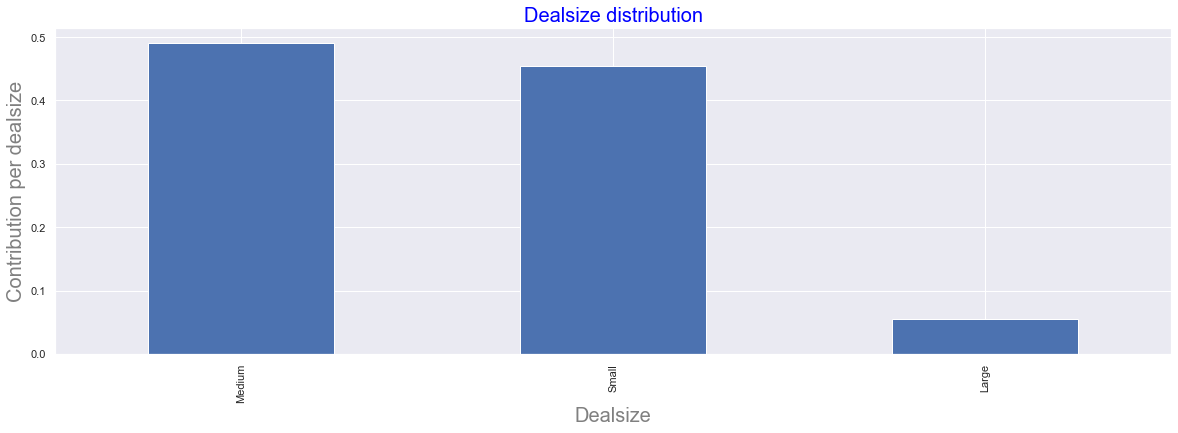

In [202]:
dealsize_analysis=dataset['DEALSIZE'].value_counts(normalize=True)
dealsize_analysis.plot(kind='bar')
plt.xlabel('Dealsize',fontsize=20,color='grey')
plt.ylabel('Contribution per dealsize',fontsize=20,color='grey')
plt.title('Dealsize distribution', fontsize=20, color='blue')
plt.show()

***This shows that Medium size orders are the one occuring the most, followed by small size and then Large size which is only 9% of overall transactions.***

**Breakdown sales per size**

2018 DEALSIZE
Medium    1772988.53
Small      888461.41
Large      236700.00
Name: SALES, dtype: float64
2019 DEALSIZE
Medium    2326929.88
Small     1307970.99
Large      278800.00
Name: SALES, dtype: float64
2020 DEALSIZE
Medium    861818.27
Small     393959.80
Large     223257.91
Name: SALES, dtype: float64


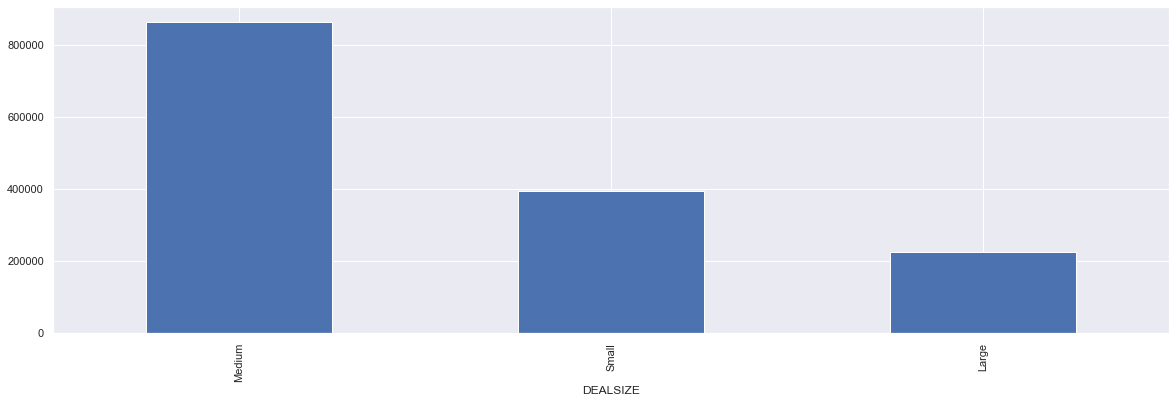

In [203]:
a=[2018,2019,2020]
for x in a:
    print(x,dataset[dataset.YEAR_ID==x].groupby(['DEALSIZE'])['SALES'].sum().sort_values(ascending=False))
_=dataset[dataset.YEAR_ID==x].groupby(['DEALSIZE'])['SALES'].sum().sort_values(ascending=False).plot(kind='bar')
plt.show()

**Breakdown sales per country**

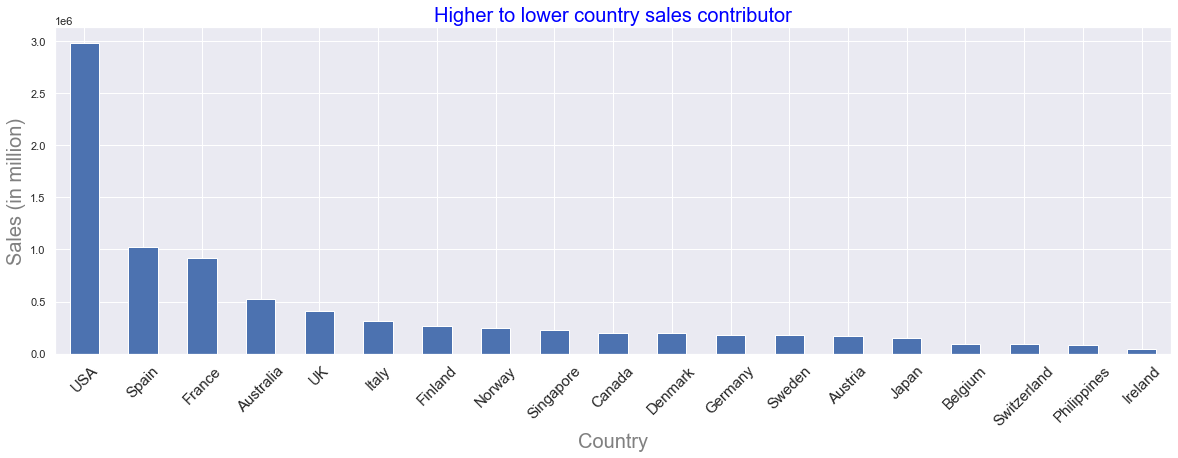

In [204]:
country_cont=dataset.groupby(['COUNTRY'])['SALES'].sum().sort_values(ascending=False)
country_cont.plot(kind='bar')
plt.xticks (rotation=45, fontsize=15)
plt.xlabel('Country',fontsize=20,color='grey')
plt.ylabel('Sales (in million)',fontsize=20,color='grey')
plt.title('Higher to lower country sales contributor',fontsize=20,color='blue')
plt.show()

**Distribution of customers per year**

YEAR_ID
2018    69
2019    84
2020    40
Name: CUSTOMERNAME, dtype: int64

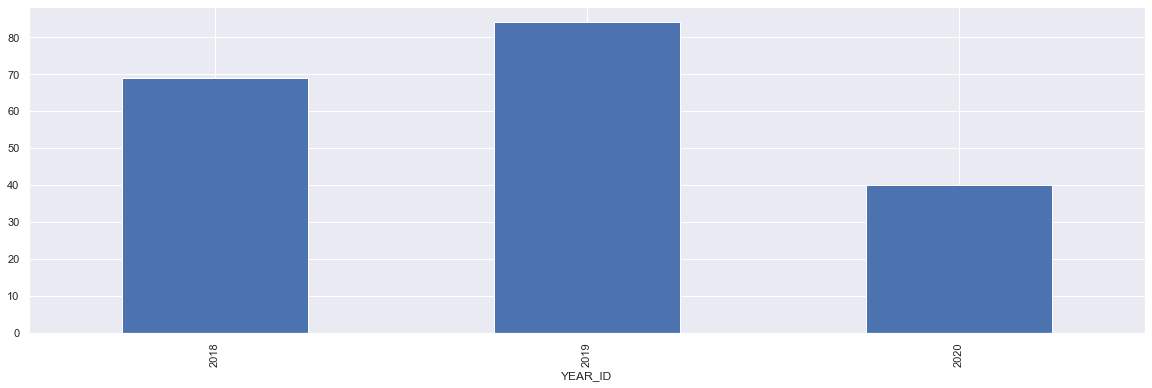

In [205]:
dataset.groupby(['YEAR_ID'])['CUSTOMERNAME'].nunique().plot(kind='bar')
dataset.groupby(['YEAR_ID'])['CUSTOMERNAME'].nunique()

***Number of customer went up from 2018 to 2019 and this might be a good sign of customers retention.***

MONTH_ID
1     23
2     19
3     21
4     23
5     25
6     14
7     14
8     16
9     20
10    26
11    52
12    13
Name: CUSTOMERNAME, dtype: int64

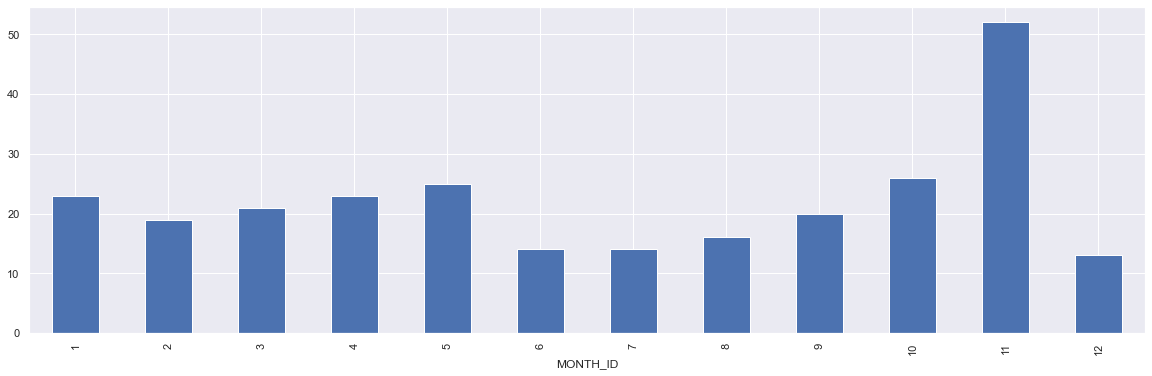

In [206]:
dataset.groupby(['MONTH_ID'])['CUSTOMERNAME'].nunique().plot(kind='bar')
dataset.groupby(['MONTH_ID'])['CUSTOMERNAME'].nunique()

***More customers are active on November and this might explain why sales scale up during that month, dealsize and prices being unchanged.*** 

*let's check this out through a scatter plot between sales and number of customers*

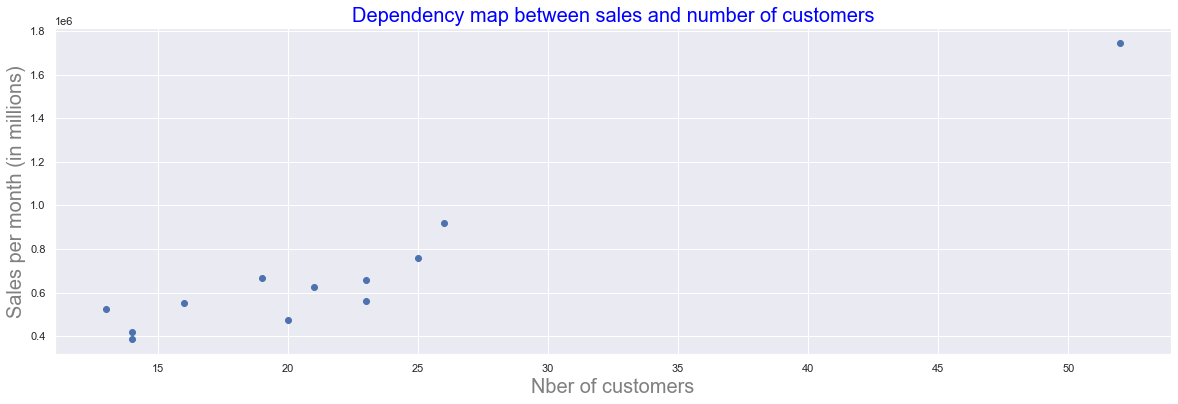

In [207]:
customer=dataset.groupby(["MONTH_ID"])['CUSTOMERNAME'].nunique()
sales=dataset.groupby(['MONTH_ID'])['SALES'].sum()
plt.scatter(customer,sales)
plt.xlabel('Nber of customers', fontsize=20, color='grey')
plt.ylabel('Sales per month (in millions)', fontsize=20, color='grey')
plt.title('Dependency map between sales and number of customers', fontsize=20, color='blue')
plt.show()

***The amount of sales correlated with the number of customers. More we have customers, more sales go high and vice versa and
this confirms why november is the higher sales month.***

# What countries contribute the most #

**Let's plot the Pareto chart**

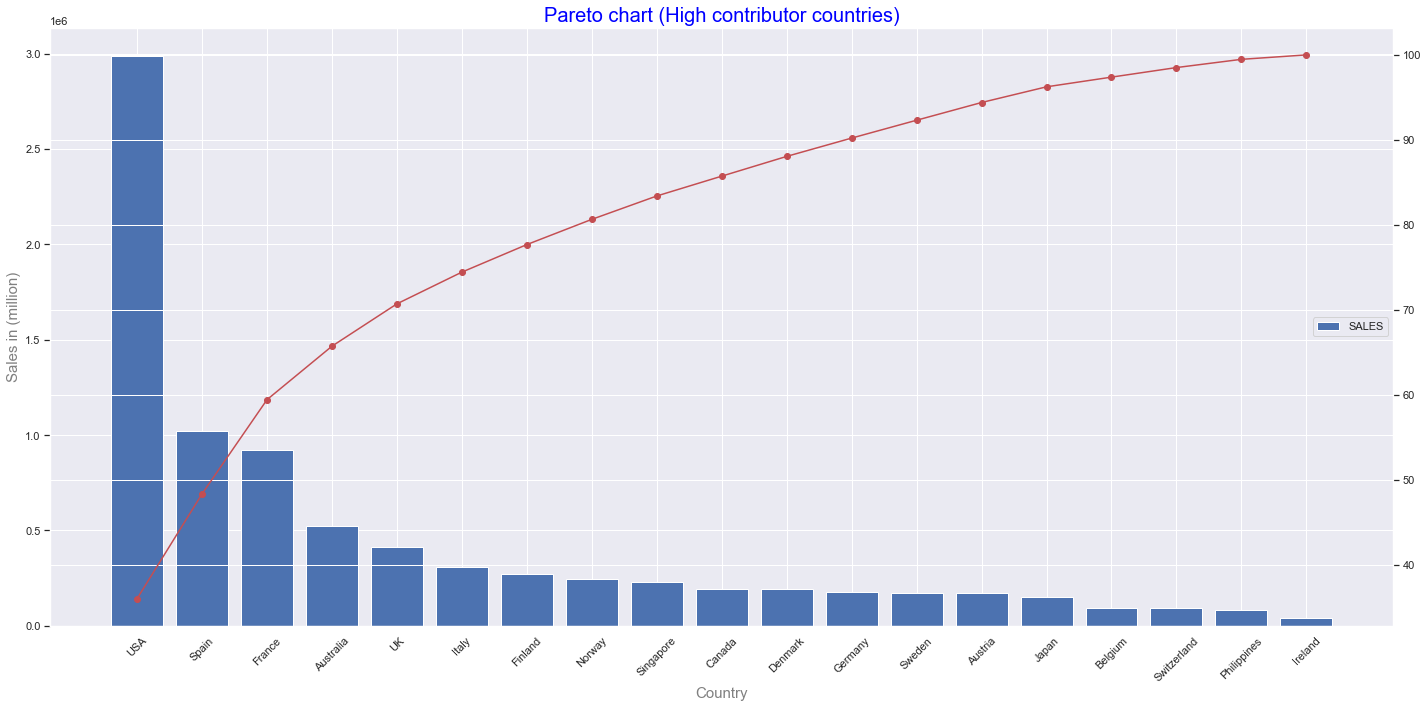

In [208]:
country=pd.DataFrame(dataset.groupby(['COUNTRY'])['SALES'].sum().sort_values(ascending=False))
country['cumul_sum']=country['SALES'].cumsum()
country['cum_sum_pct']=country['cumul_sum']/country['SALES'].sum()*100

plt.figure(figsize=(20, 10))

axes1 = plt.subplot()
axes1.bar(country.index,country['SALES'], label='SALES')

plt.xticks(rotation=45)

axes2 = axes1.twinx()

axes2.plot(country.index, country['cum_sum_pct'], c='r', marker='o',zorder=5, label='Cumulative Percentage')

axes1.legend( loc='center right')
axes1.set_xlabel('Country', fontsize=15, color='grey')
axes1.set_ylabel('Sales in (million)',fontsize=15, color='grey')
plt.title('Pareto chart (High contributor countries)',fontsize=20, color='blue')

plt.tight_layout()
plt.show()

***8/19 countries contribute to 80% of sales. These are USA, Spain, France, Australia, UK, Italy, Finland, and Norway.***

# What Territory contributes the most #

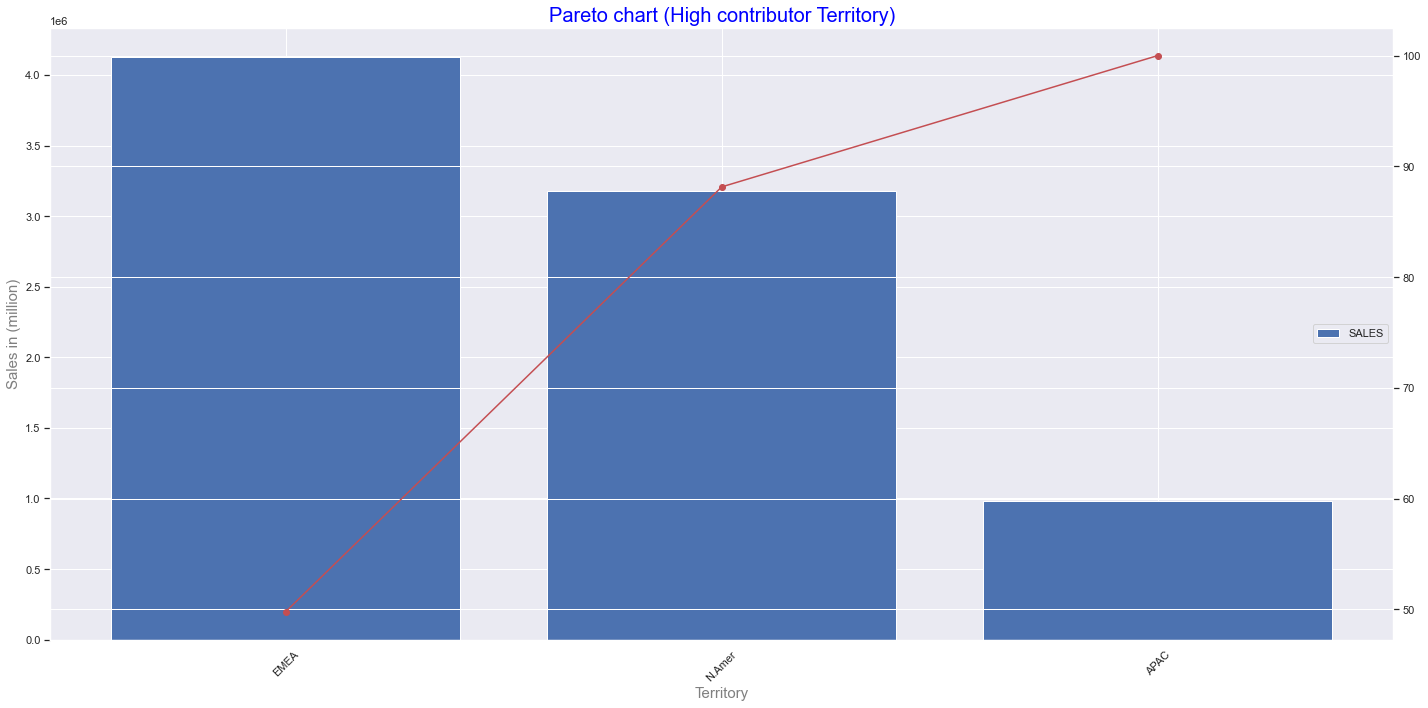

In [209]:
territory=pd.DataFrame(dataset.groupby(['TERRITORY'])['SALES'].sum().sort_values(ascending=False))
territory['cumul_sum']=territory['SALES'].cumsum()
territory['cum_sum_pct']=territory['cumul_sum']/territory['SALES'].sum()*100

plt.figure(figsize=(20, 10))

axes1 = plt.subplot()
axes1.bar(territory.index,territory['SALES'], label='SALES')

plt.xticks(rotation=45)

axes2 = axes1.twinx()

axes2.plot(territory.index, territory['cum_sum_pct'], c='r', marker='o',zorder=5, label='Cumulative Percentage')

axes1.legend( loc='center right')
axes1.set_xlabel('Territory', fontsize=15, color='grey')
axes1.set_ylabel('Sales in (million)',fontsize=15, color='grey')
plt.title('Pareto chart (High contributor Territory)',fontsize=20, color='blue')

plt.tight_layout()
plt.show()

***EMEA and North America both generate more than 85% of sales***

## Who are those doing this ##

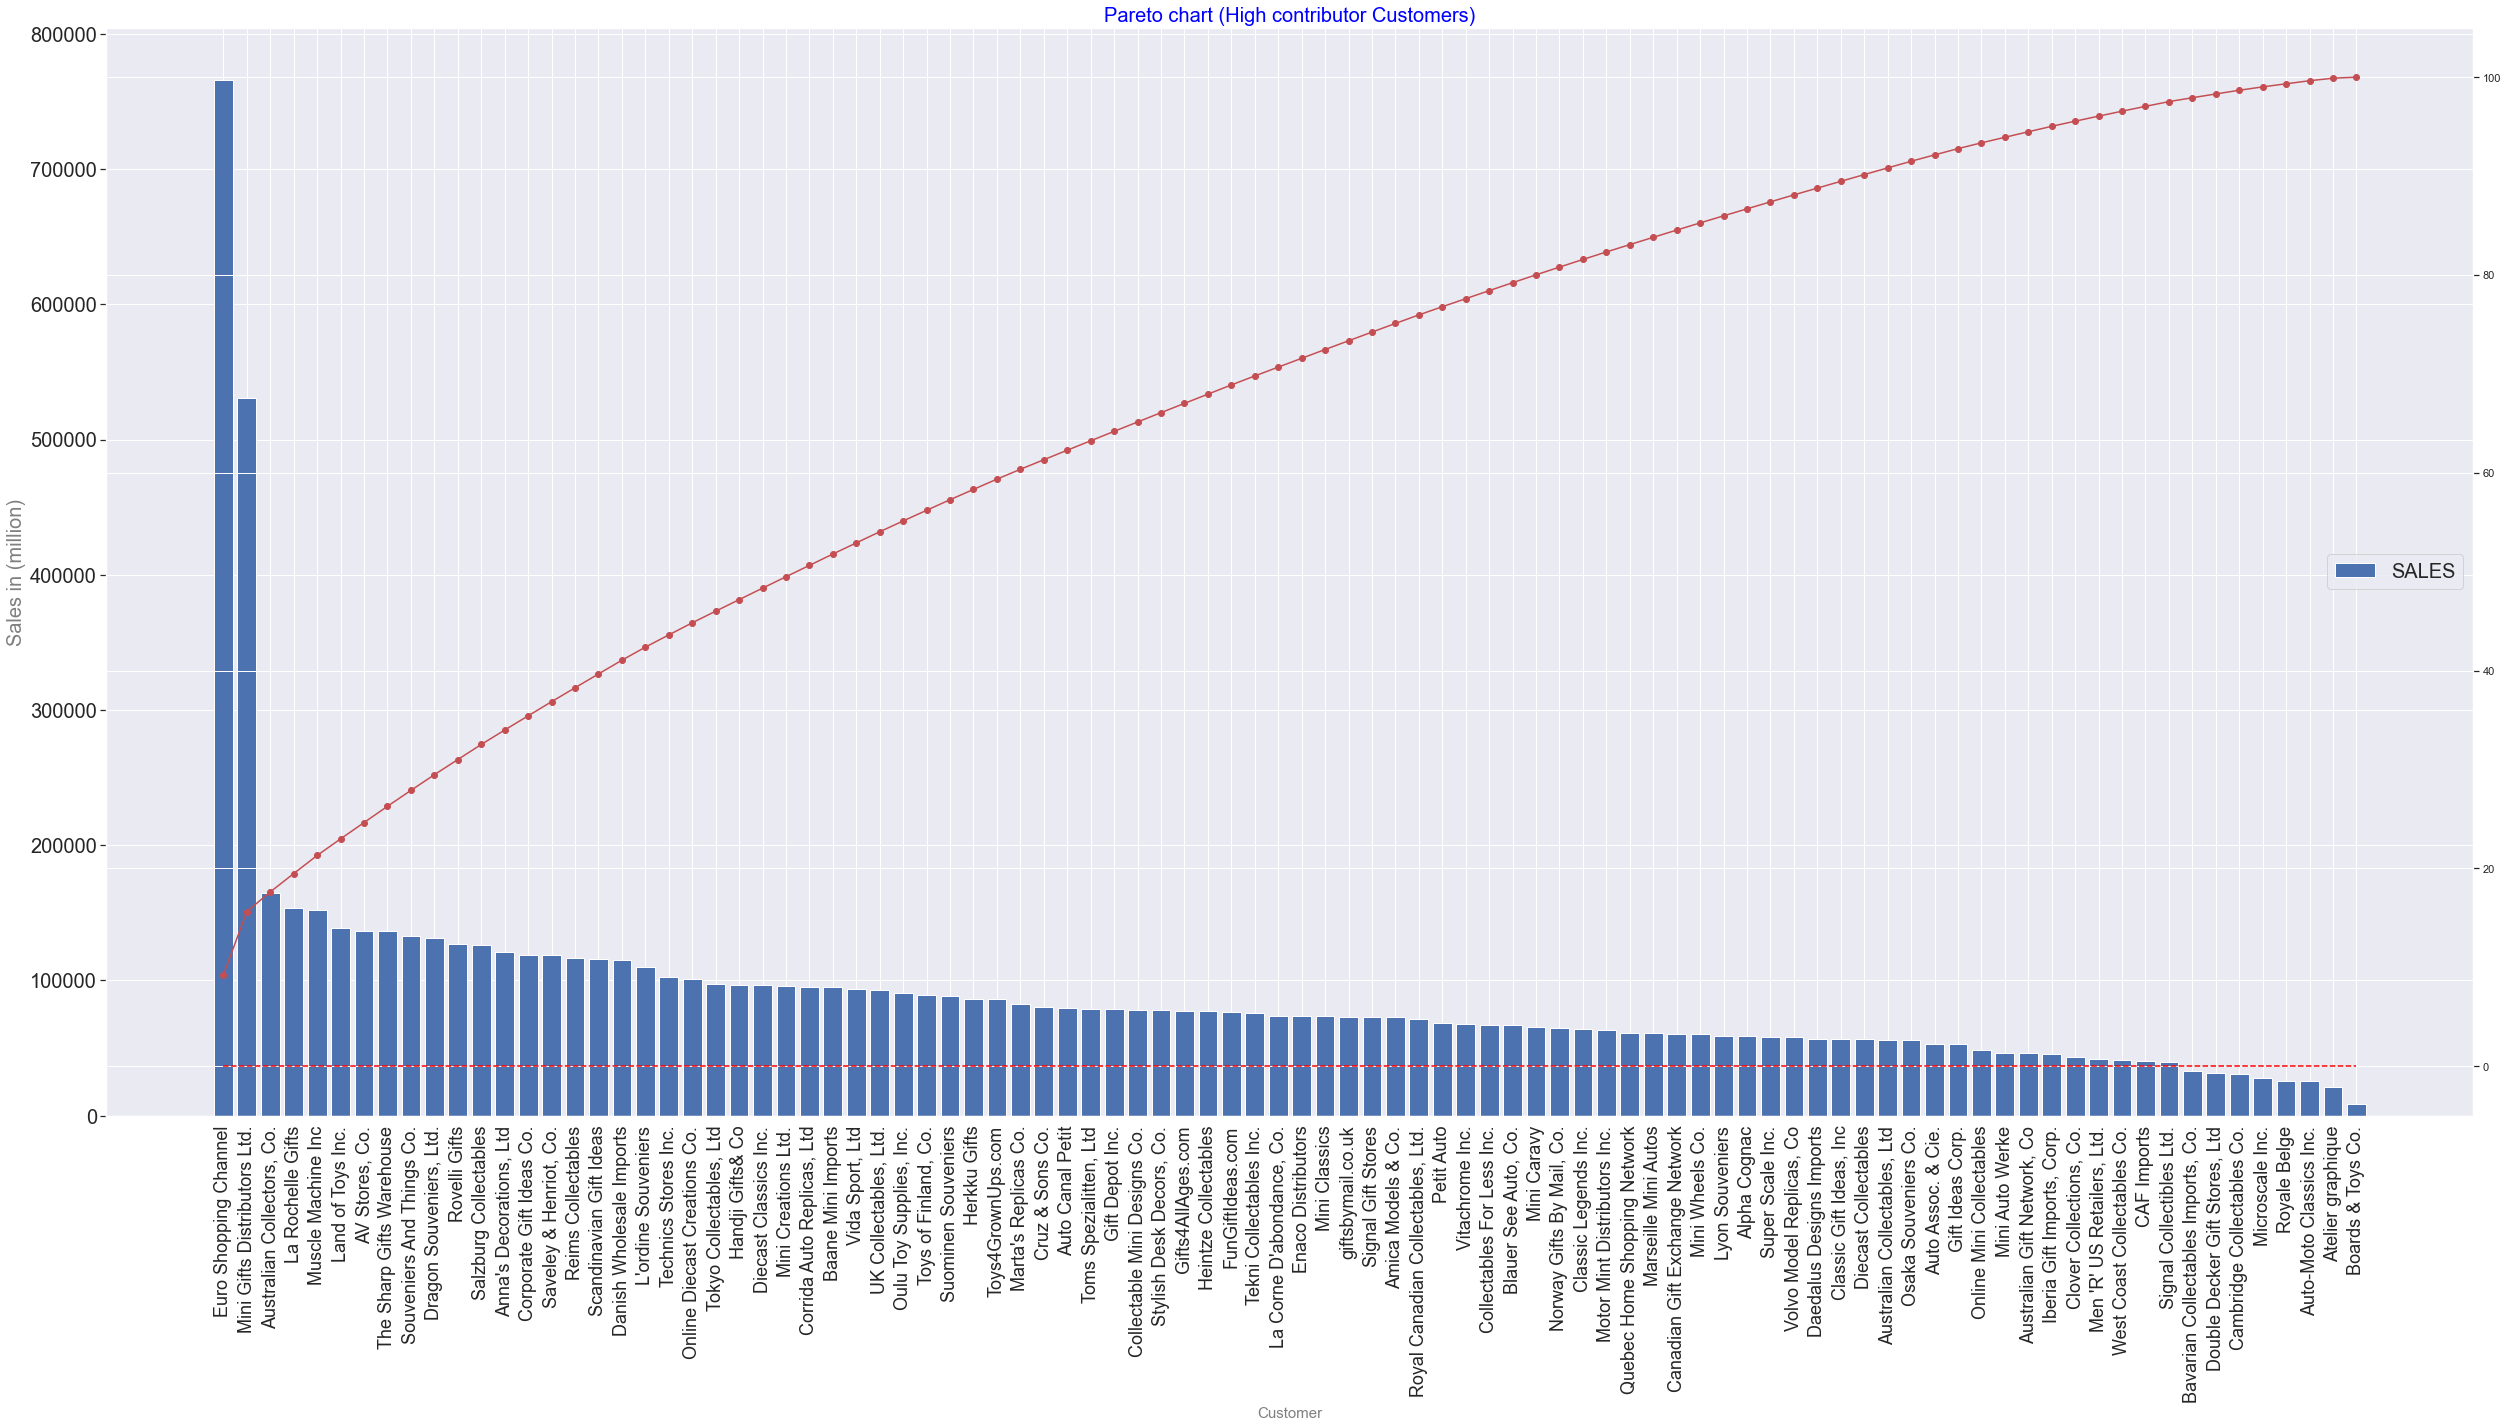

In [210]:
customer=pd.DataFrame(dataset.groupby(['CUSTOMERNAME'])['SALES'].sum().sort_values(ascending=False))
customer['cumul_sum']=customer['SALES'].cumsum()
customer['cum_sum_pct']=customer['cumul_sum']/customer['SALES'].sum()*100

plt.figure(figsize=(35, 20))

axes1 = plt.subplot()
axes1.bar(customer.index,customer['SALES'], label='SALES')

plt.xticks(rotation=90,fontsize=18)
plt.yticks(fontsize=20)

axes2 = axes1.twinx()

axes2.plot(customer.index, customer['cum_sum_pct'],c='r', marker='o',zorder=5, label='Cumulative Percentage')
axes2.plot(customer.index, customer['cum_sum_pct']==80.016273,linestyle='--', color='red')

axes1.legend( loc='center right',fontsize=20)
axes1.set_xlabel('Customer', fontsize=15, color='grey')
axes1.set_ylabel('Sales in (million)',fontsize=20, color='grey')
plt.title('Pareto chart (High contributor Customers)',fontsize=20, color='blue')

plt.tight_layout()
plt.show( )

***57/92 customers provide a little more than 80% of sales, this means that, thus far 38% of customers provide just 20% of sales.***

**Let's rank customers from the higher to lower contributor**

In [211]:
pd.options.display.max_rows=100
customer['Rank']=customer['SALES'].rank(ascending=False)
customer

,SALES,cumul_sum,cum_sum_pct,Rank
CUSTOMERNAME,,,,
Euro Shopping Channel,766195.05,766195.05,9.241413,1.0
Mini Gifts Distributors Ltd.,530587.19,1296782.24,15.641056,2.0
"Australian Collectors, Co.",164575.87,1461358.11,17.626077,3.0
La Rochelle Gifts,153909.82,1615267.93,19.482451,4.0
Muscle Machine Inc,151782.04,1767049.97,21.313160,5.0
Land of Toys Inc.,138798.17,1905848.14,22.987265,6.0
"AV Stores, Co.",136873.25,2042721.39,24.638153,7.0
The Sharp Gifts Warehouse,136383.04,2179104.43,26.283129,8.0
Souveniers And Things Co.,133223.38,2312327.81,27.889994,9.0


# What product line contribute the most #

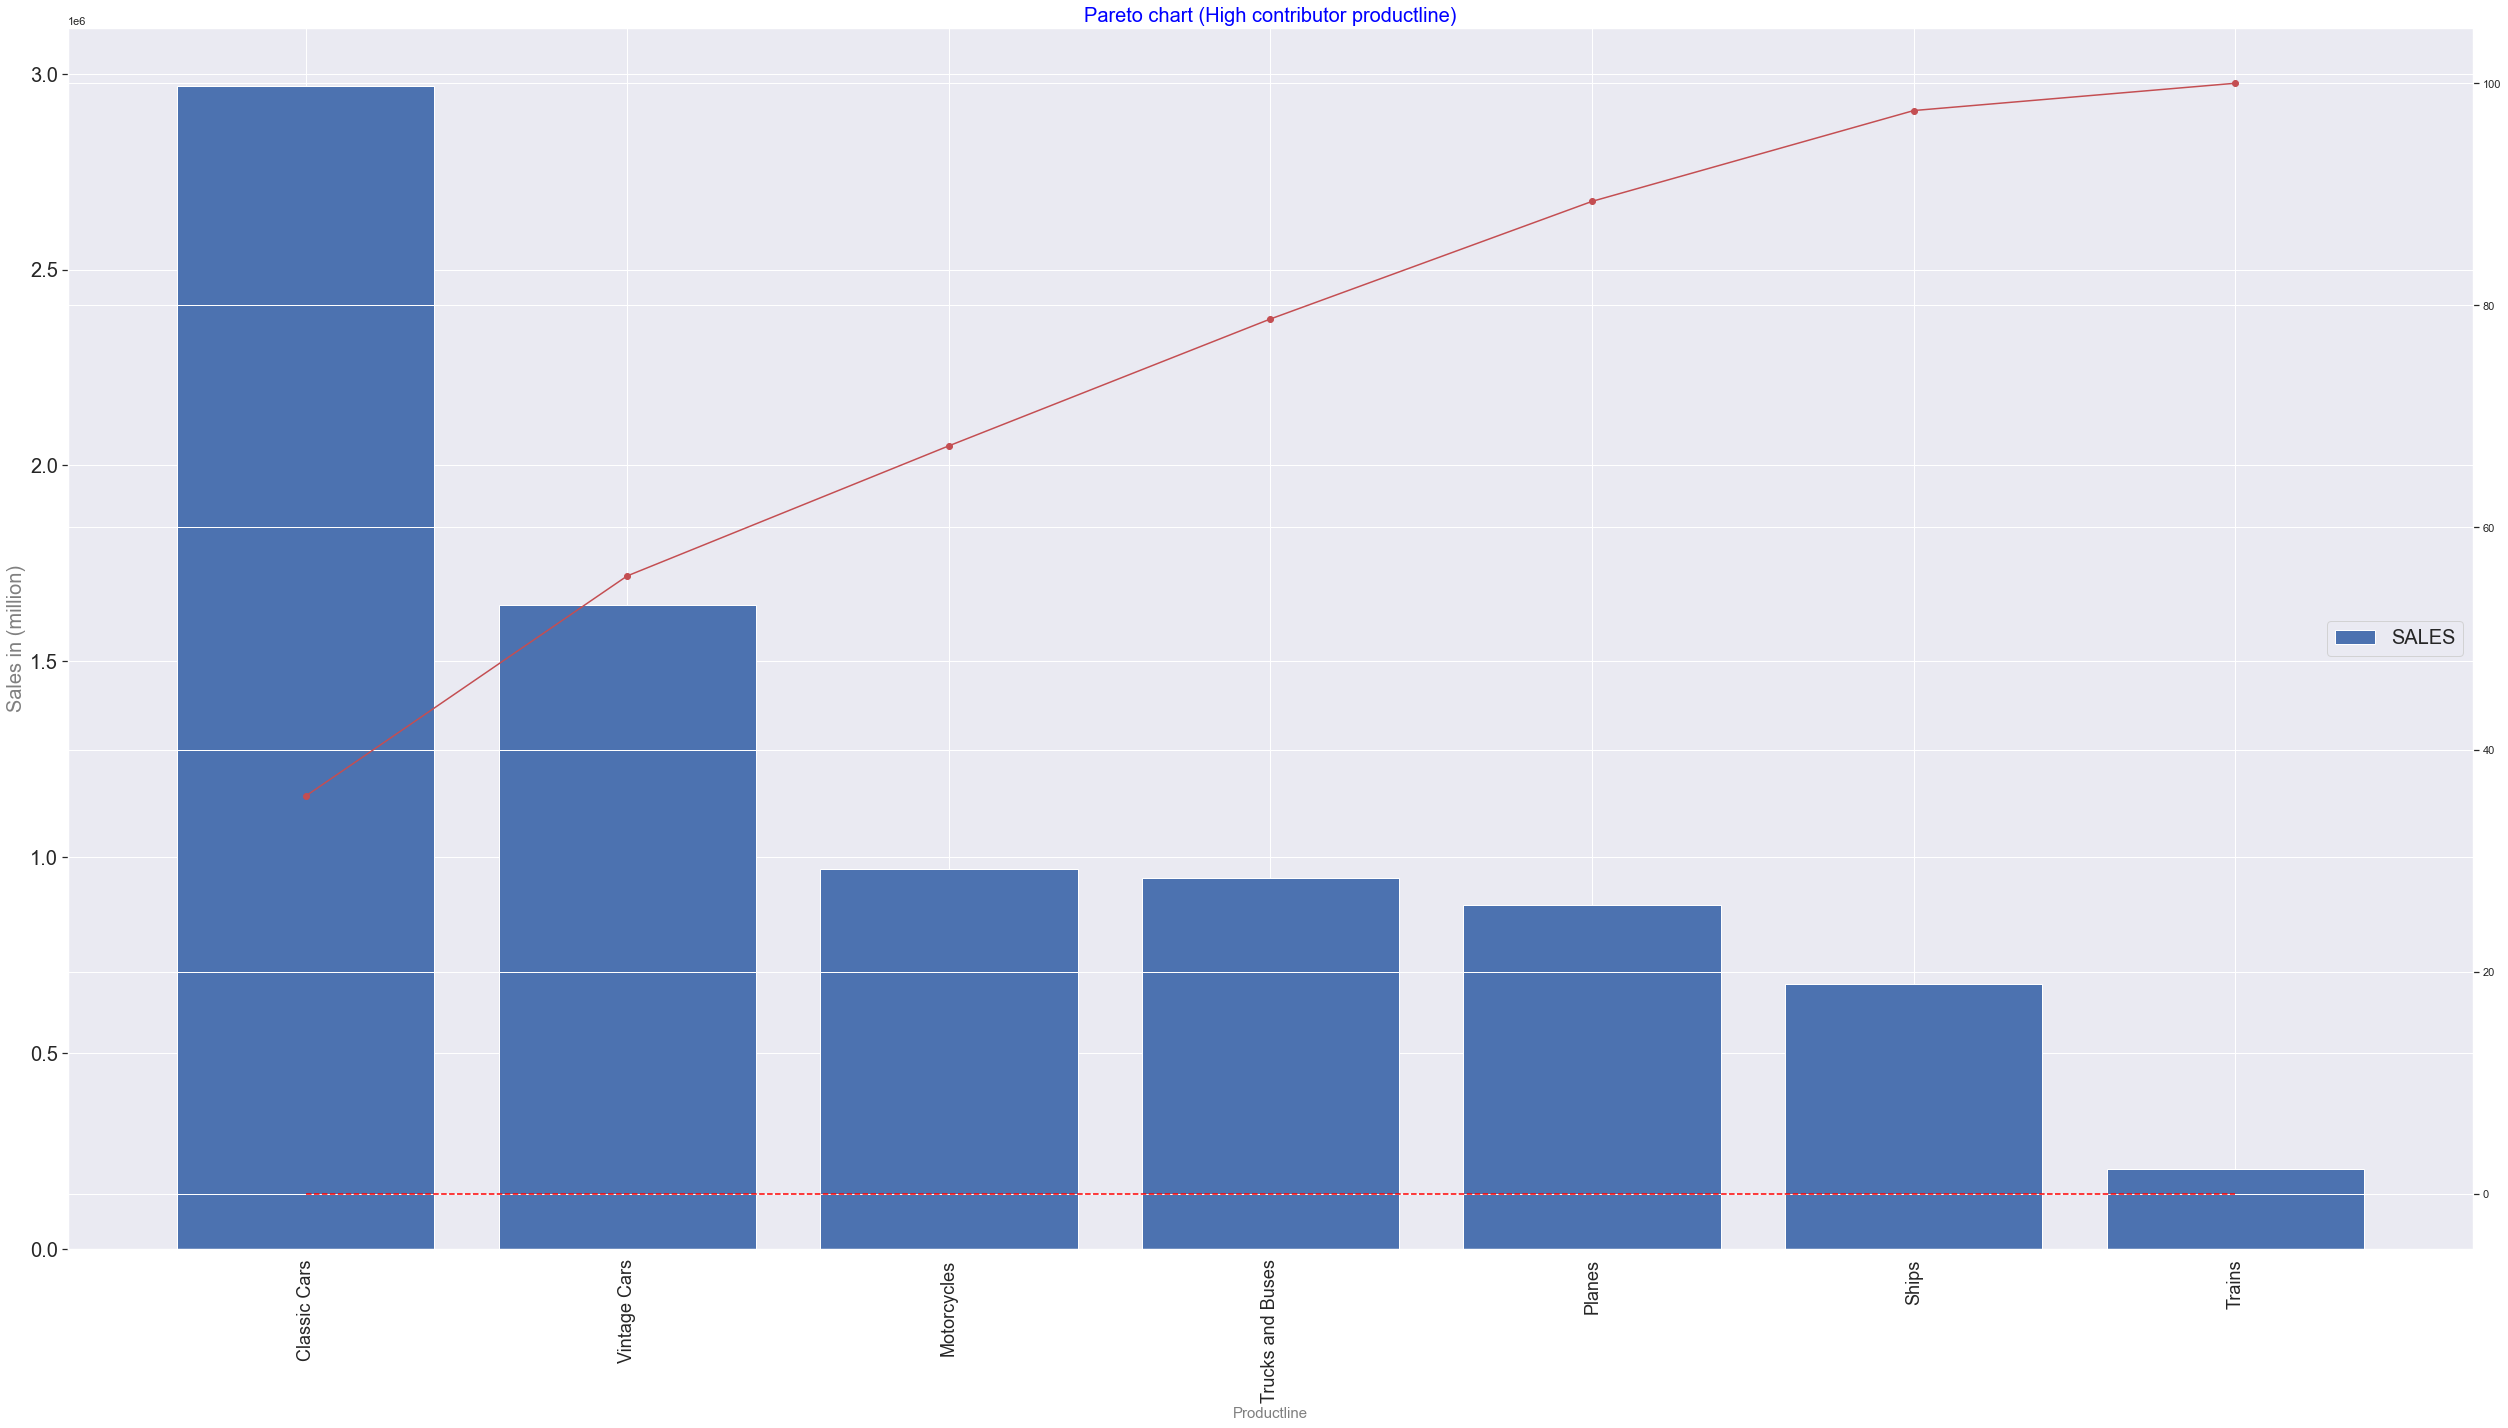

In [212]:
productline=pd.DataFrame(dataset.groupby(['PRODUCTLINE'])['SALES'].sum().sort_values(ascending=False))
productline['cumul_sum']=productline['SALES'].cumsum()
productline['cum_sum_pct']=productline['cumul_sum']/productline['SALES'].sum()*100

plt.figure(figsize=(35, 20))

axes1 = plt.subplot()
axes1.bar(productline.index,productline['SALES'], label='SALES')

plt.xticks(rotation=90,fontsize=18)
plt.yticks(fontsize=20)

axes2 = axes1.twinx()

axes2.plot(productline.index, productline['cum_sum_pct'],c='r', marker='o',zorder=5, label='Cumulative Percentage')
axes2.plot(productline.index, productline['cum_sum_pct']==80.016273,linestyle='--', color='red')

axes1.legend(loc='center right',fontsize=20)
axes1.set_xlabel('Productline', fontsize=15, color='grey')
axes1.set_ylabel('Sales in (million)',fontsize=20, color='grey')
plt.title('Pareto chart (High contributor productline)',fontsize=20, color='blue')

plt.tight_layout()
plt.show( )

***4 products contribute to almost 80% of sales, and those are: Classic Cars, Vintage Cars, Motorcycles, and Trucks and Buses.***

In [213]:
productline=pd.DataFrame(dataset.groupby(['PRODUCTLINE'])['SALES'].sum().sort_values(ascending=False))
productline['cumul_sum']=productline['SALES'].cumsum()
productline['cum_sum_pct']=productline['cumul_sum']/productline['SALES'].sum()*100
productline['Rank']=productline['SALES'].rank(ascending=False)
productline

,SALES,cumul_sum,cum_sum_pct,Rank
PRODUCTLINE,,,,
Classic Cars,2968546.40,2968546.40,35.804932,1.0
Vintage Cars,1644212.05,4612758.45,55.636491,2.0
Motorcycles,971086.29,5583844.74,67.349186,3.0
Trucks and Buses,947355.18,6531199.92,78.775650,4.0
Planes,877942.21,7409142.13,89.364893,5.0
Ships,677940.40,8087082.53,97.541828,6.0
Trains,203804.26,8290886.79,100.000000,7.0


## SEGMENTATION MODEL ##

*Let's shape our dataset once more . We have a bunch of categorical variables and we would need to encode them to craft our model.*

In [214]:
to_be_dropped=['CONTACTLASTNAME','CONTACTFIRSTNAME','CUSTOMERNAME','ORDERDATE']

In [215]:
dataset=dataset.drop(to_be_dropped,axis=1)

In [216]:
dataset['STATUS'].replace({'Disputed':2,
                          'Cancelled':2,
                          'On Hold':2,
                          'Resolved':0,
                          'In Process':0,
                          'Shipped':1}, inplace=True)
pd.options.display.max_columns=100

In [217]:
dataset= pd.get_dummies(data=dataset, columns=['PRODUCTLINE', 'DEALSIZE', 'COUNTRY','TERRITORY'])

In [218]:
pd.Categorical(dataset['PRODUCT\nCODE']).codes

array([  0,   0,   0, ..., 108, 108, 108], dtype=int8)

In [219]:
dataset['PRODUCT\nCODE'] = pd.Categorical(dataset['PRODUCT\nCODE']).codes

***Let's Standardize our dataset***

In [220]:
dataset_std=StandardScaler().fit_transform(dataset)
dataset_std

array([[-0.52289086,  0.5969775 , -0.05961961, ..., -0.37127839,
        -0.99681697,  1.27612367],
       [-0.11220131, -0.11445035, -0.15469415, ..., -0.37127839,
         1.0031932 , -0.78362311],
       [ 0.60650538,  0.54938372,  0.85705815, ..., -0.37127839,
         1.0031932 , -0.78362311],
       ...,
       [ 0.81185016,  0.81015797,  1.23306845, ..., -0.37127839,
         1.0031932 , -0.78362311],
       [-0.11220131, -1.06186404, -0.74245562, ..., -0.37127839,
         1.0031932 , -0.78362311],
       [ 1.2225397 , -0.89925195,  0.12893735, ..., -0.37127839,
        -0.99681697,  1.27612367]])

## SEGMENTATION MODEL ##

**How many clusters could be found** (***Hierarchical clustering***)

In [221]:
hier_cluster=linkage(dataset_std,method='ward')# This line return the linkage matrix

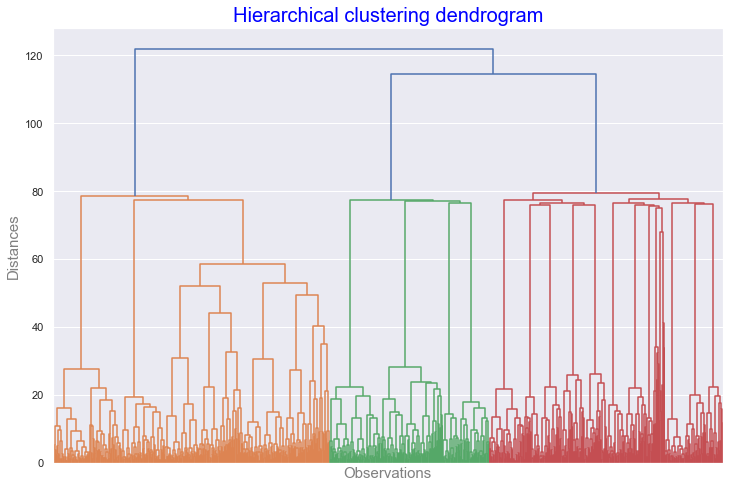

In [222]:
plt.figure(figsize=(12,8))
dendrogram(hier_cluster,show_leaf_counts=False,no_labels=True,truncate_mode='level',p=10)
plt.title('Hierarchical clustering dendrogram', color='blue', fontsize=20)
plt.xlabel('Observations', color='grey', fontsize=15)
plt.ylabel('Distances', color='grey', fontsize=15)
plt.show()

***It seems like dataset observations could be separated in 3 different clusters as shown on the hierarchical clustering chart above.***

## **Let's confirm this, clustering with KMEANS** ##

In [223]:
wcss=[]
for i in range(1,11):
    kmeans=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans.fit(dataset_std)
    wcss.append(kmeans.inertia_)

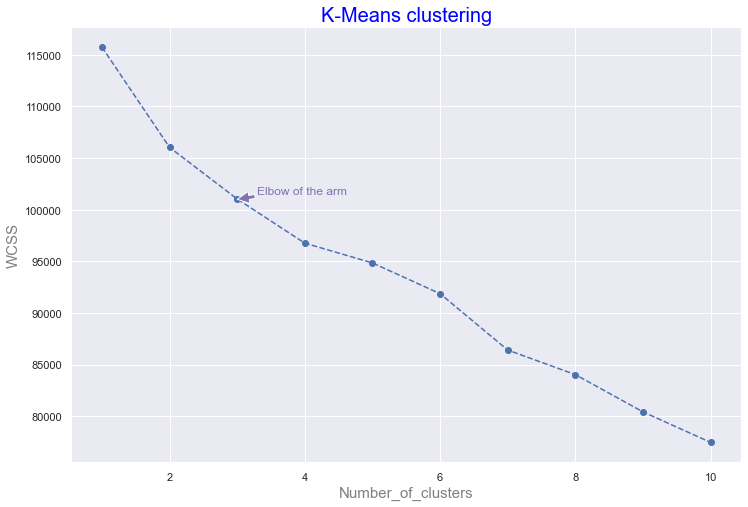

In [224]:
plt.figure(figsize=(12,8))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.xlabel('Number_of_clusters', fontsize=15,color='grey')
plt.ylabel('WCSS', fontsize=15,color='grey')
plt.title('K-Means clustering', fontsize=20,color='blue')
plt.annotate('Elbow of the arm',xy=(3,101000),xytext=(3+0.3,101505),arrowprops=dict(facecolor='m'),color ='m')
plt.show()

***Using Elbow method as recommended to determine the number of clusters here is quite tricky, so we trust the hierarchical clustering that suggest 3 clusters (composed of sub-clusters with similarities)***

***Let's perform KMeans clustering with 3 clusters and fit our standardized data using kmeans. fit()***

In [225]:
kmeans=KMeans(n_clusters=3,init='k-means++', random_state=42)
kmeans.fit(dataset_std)

KMeans(n_clusters=3, random_state=42)

In [226]:
dataset_segm_kmeans=dataset.copy()
dataset_segm_kmeans['segment k-means']=kmeans.labels_ # to add segment k-means column

dataset_segm_analysis=dataset_segm_kmeans.groupby(['segment k-means']).mean()
dataset_segm_analysis

,QUANTITY\nORDERED,PRICEEACH,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCT\nCODE,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small,COUNTRY_Australia,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,TERRITORY_APAC,TERRITORY_EMEA,TERRITORY_N.Amer
segment k-means,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,38.886291,95.792593,3697.658353,1.000000,2.633369,6.825717,2018.819341,120.550478,46.599362,0.424017,0.094580,0.093518,0.075452,0.020191,0.121148,0.171095,0.097768,0.899044,0.003188,0.099894,0.035069,0.015940,0.000000,0.039320,0.055260,0.180659,0.036132,0.008502,0.054198,0.025505,0.049947,0.015940,0.044633,0.199787,0.036132,0.023379,0.079702,0.000000,0.185972,0.814028,0.0
1,35.337058,83.907542,2960.828259,1.032588,2.811918,7.378957,2018.804469,101.005587,53.202980,0.319367,0.139665,0.097765,0.078212,0.023277,0.119181,0.222533,0.060521,0.500931,0.438547,0.000000,0.000000,0.000000,0.065177,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.934823,0.000000,0.000000,1.0
2,30.350248,69.196213,2019.134567,0.993812,2.690594,7.022277,2018.824257,77.230198,62.886139,0.278465,0.113861,0.139851,0.097772,0.040842,0.073020,0.256188,0.000000,0.000000,1.000000,0.112624,0.027228,0.022277,0.000000,0.032178,0.049505,0.178218,0.034653,0.009901,0.076733,0.034653,0.047030,0.013614,0.045792,0.190594,0.028465,0.011139,0.085396,0.000000,0.206683,0.793317,0.0


In [227]:
dataset_segm_analysis['NUM_CUSTOMERS']=dataset_segm_kmeans[['segment k-means','PRODUCT\nCODE']].groupby(['segment k-means']).count()
dataset_segm_analysis['PCT_CUSTOMERS']=dataset_segm_analysis['NUM_CUSTOMERS']/dataset_segm_analysis['NUM_CUSTOMERS'].sum()
dataset_segm_analysis

,QUANTITY\nORDERED,PRICEEACH,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCT\nCODE,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small,COUNTRY_Australia,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,TERRITORY_APAC,TERRITORY_EMEA,TERRITORY_N.Amer,NUM_CUSTOMERS,PCT_CUSTOMERS
segment k-means,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,38.886291,95.792593,3697.658353,1.000000,2.633369,6.825717,2018.819341,120.550478,46.599362,0.424017,0.094580,0.093518,0.075452,0.020191,0.121148,0.171095,0.097768,0.899044,0.003188,0.099894,0.035069,0.015940,0.000000,0.039320,0.055260,0.180659,0.036132,0.008502,0.054198,0.025505,0.049947,0.015940,0.044633,0.199787,0.036132,0.023379,0.079702,0.000000,0.185972,0.814028,0.0,941,0.333333
1,35.337058,83.907542,2960.828259,1.032588,2.811918,7.378957,2018.804469,101.005587,53.202980,0.319367,0.139665,0.097765,0.078212,0.023277,0.119181,0.222533,0.060521,0.500931,0.438547,0.000000,0.000000,0.000000,0.065177,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.934823,0.000000,0.000000,1.0,1074,0.380446
2,30.350248,69.196213,2019.134567,0.993812,2.690594,7.022277,2018.824257,77.230198,62.886139,0.278465,0.113861,0.139851,0.097772,0.040842,0.073020,0.256188,0.000000,0.000000,1.000000,0.112624,0.027228,0.022277,0.000000,0.032178,0.049505,0.178218,0.034653,0.009901,0.076733,0.034653,0.047030,0.013614,0.045792,0.190594,0.028465,0.011139,0.085396,0.000000,0.206683,0.793317,0.0,808,0.286220


In [228]:
dataset_segm_analysis['NUM_CUSTOMERS'].sum()

2823

In [229]:
# Add a label (which cluster) corresponding to each data point
dataset_with_clusters= pd.concat([dataset, pd.DataFrame(dataset_segm_kmeans['segment k-means'])], axis = 1)
dataset_with_clusters

,QUANTITY\nORDERED,PRICEEACH,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCT\nCODE,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small,COUNTRY_Australia,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,TERRITORY_APAC,TERRITORY_EMEA,TERRITORY_N.Amer,segment k-means
ORDER NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10107,30,95.70,2871.00,1,1,2,2018,95,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
10121,34,81.35,2765.90,1,2,5,2018,95,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2
10134,41,94.74,3884.34,1,3,7,2018,95,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10145,45,83.26,3746.70,1,3,8,2018,95,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
10159,49,100.00,4900.00,1,4,10,2018,95,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10350,20,100.00,2000.00,1,4,12,2019,54,108,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,2
10373,29,100.00,2900.00,1,1,1,2020,54,108,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
10386,43,100.00,4300.00,0,1,3,2020,54,108,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0


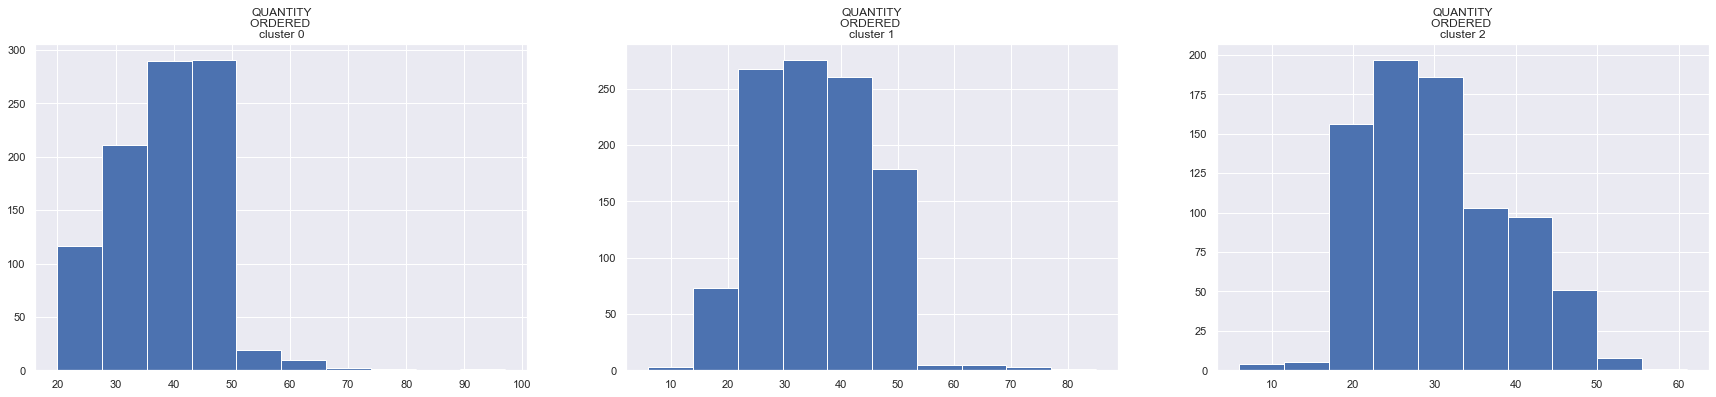

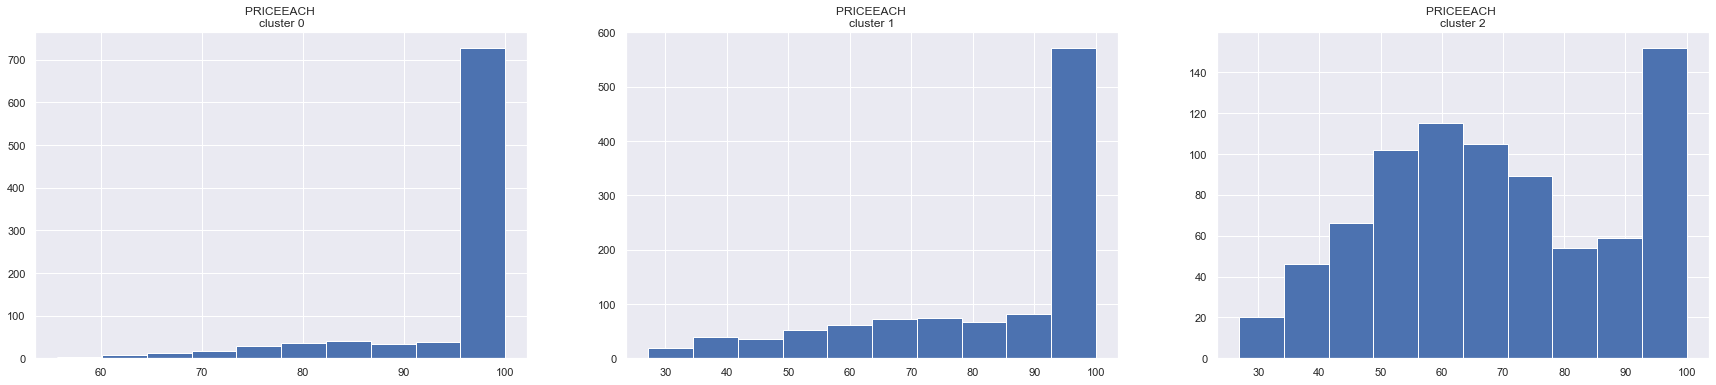

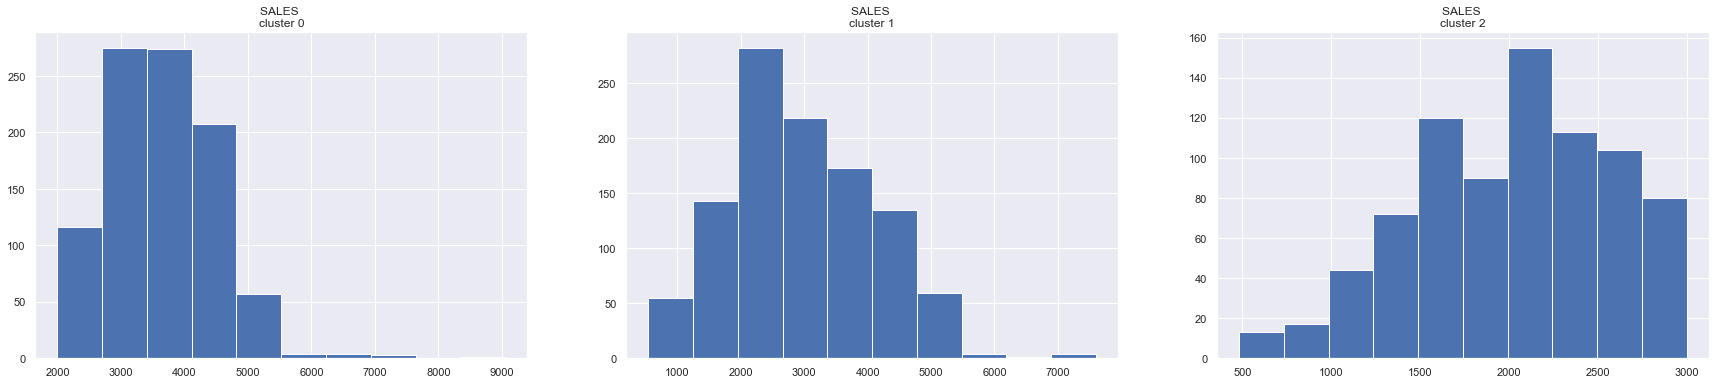

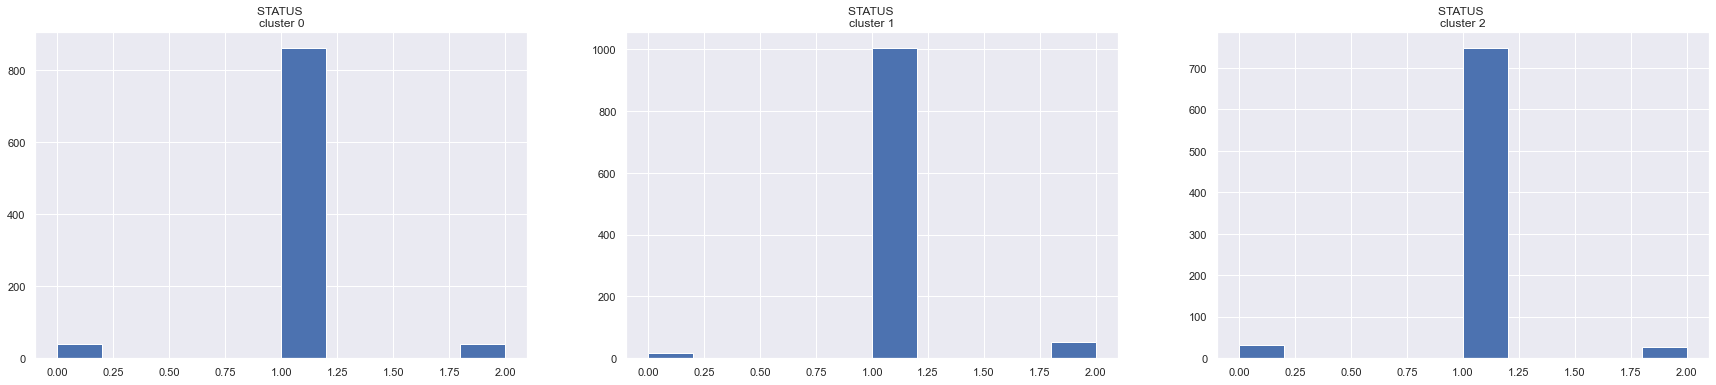

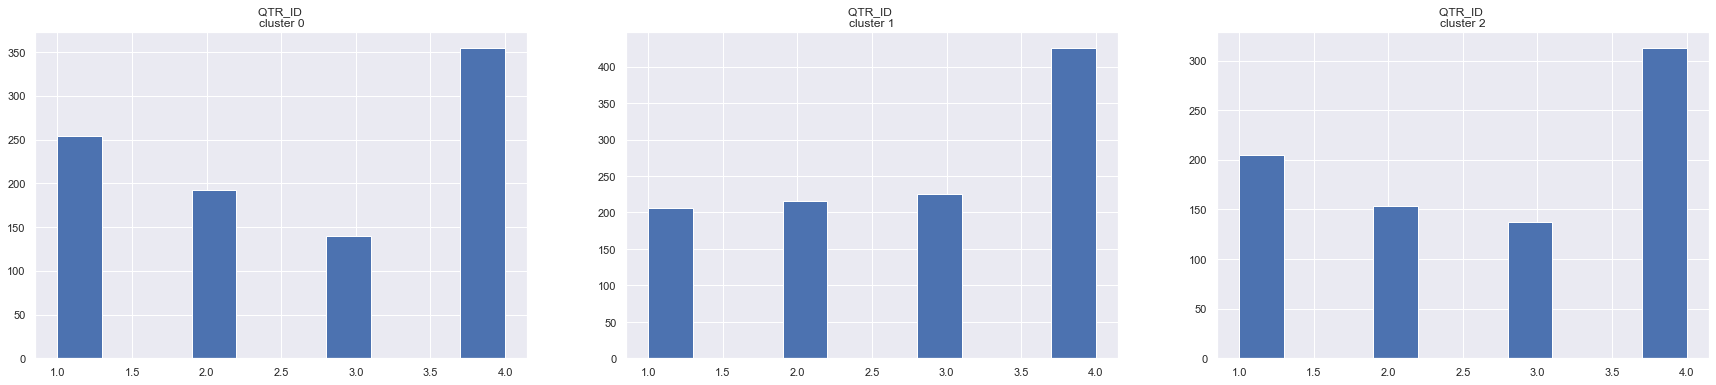

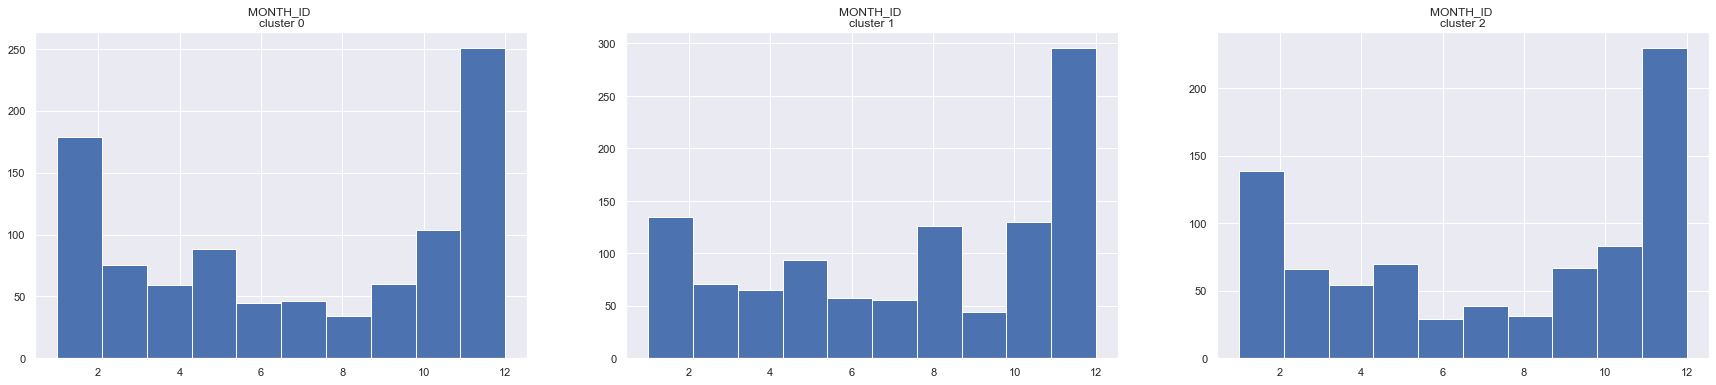

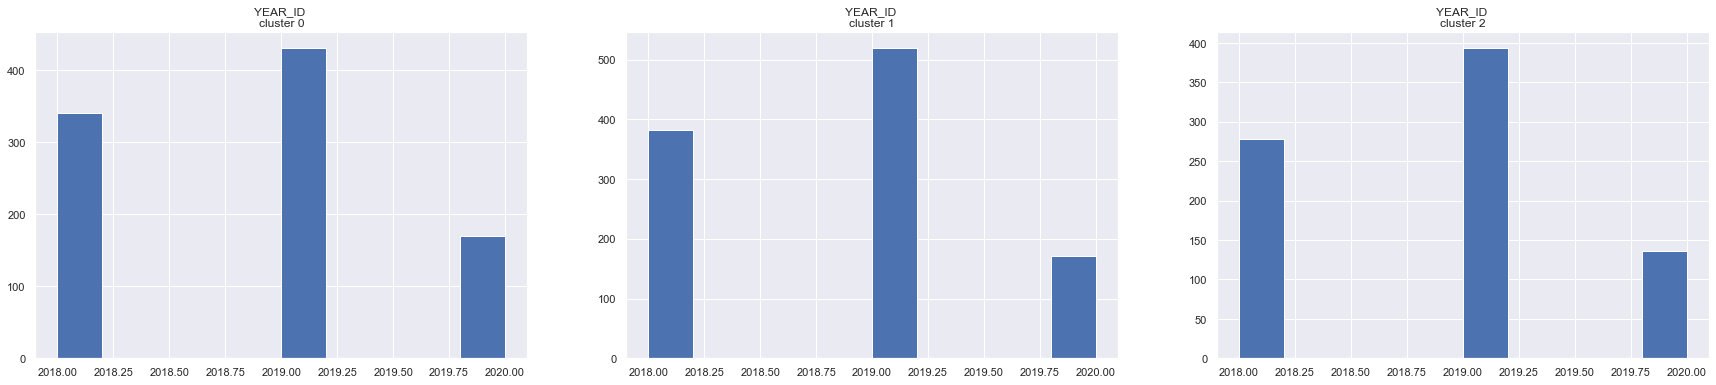

In [230]:
# plot histogram for each feature based on cluster 
for i in dataset.columns[:7]:
    plt.figure(figsize=(30,6))
    for j in range(3):
        plt.subplot(1,3,j+1)
        cluster = dataset_with_clusters[dataset_with_clusters['segment k-means']==j]
        cluster[i].hist()
        plt.title('{} \ncluster {}'.format(i,j))
plt.show()

## Segmentation based on kmeans results ##

***Cluster 0*** *is comprised of customers who contribute the more on sales, buying highest quantity of products at the highest value prices. They represent **33%** of the entire customers (thus 941). Most of them come from EMEA, and a little part in APAC, but not present at all in N. Amer. They buy either middle or small dealsize (most of them are middle), but almost no large dealsize. Let's call them **High contributor.**

***Cluster 1*** *is the more represented customers **38%** (thus 1074). They contribute less than **cluster 0** customers in sales. They are present in the 3 dealsize types (large,medium, and small in this order), and all come from N.Amer teritory exlusively (high proportion from USA and just a little one fron Canada). Let's name them **Middle contributor.**

***Cluster 2*** is **29%** of whole customers population (thus 808), they buy low value price products (69$ on average) and thus contribute the least on sales. They more come from EMEA and, a little bit from APAC, but not from N. Amer at all. They exclusively order small dealsize. Let's name them **Low contributor**

In [231]:
dataset_with_clusters['Clusters']=dataset_with_clusters['segment k-means'].replace({0: 'High contributor',
                                                                                   1: 'Middle contributor',
                                                                                   2: 'Low contributor' })                                                          
dataset_with_clusters.head()

,QUANTITY\nORDERED,PRICEEACH,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCT\nCODE,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small,COUNTRY_Australia,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,TERRITORY_APAC,TERRITORY_EMEA,TERRITORY_N.Amer,segment k-means,Clusters
ORDER NUMBER,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
10107,30,95.70,2871.00,1,1,2,2018,95,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,Middle contributor
10121,34,81.35,2765.90,1,2,5,2018,95,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,2,Low contributor
10134,41,94.74,3884.34,1,3,7,2018,95,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,High contributor
10145,45,83.26,3746.70,1,3,8,2018,95,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,Middle contributor
10159,49,100.00,4900.00,1,4,10,2018,95,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,Middle contributor


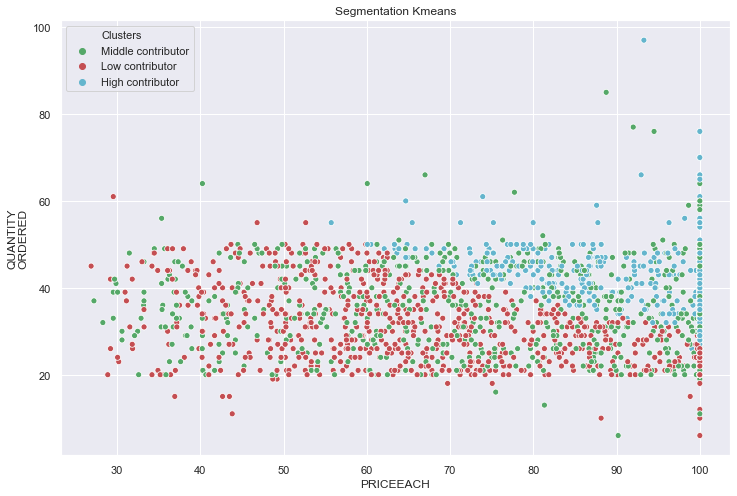

In [232]:
x_axis=dataset_with_clusters['PRICEEACH']
y_axis=dataset_with_clusters['QUANTITY\nORDERED']
plt.figure(figsize=(12,8))
sns.scatterplot(x_axis,y_axis,hue= dataset_with_clusters['Clusters'],palette=['g','r','c'])
plt.title('Segmentation Kmeans')
plt.show()

The blue cluster is identifiable but others are melted together, but we can get more of it...

We'll apply the Dimensional reduction method to simplify our problem. In this case, it's all about bringing our 3D dataset to a 2D dataset (using Linear algebra) for easier use and exploration. We can find a plan through our data that's approximataly very close to the data/observations. we'll be losing some information doing that, but the total number of features reduced.

We'll focus specifically on a dimensional reduction method called PCA (Principal Components Analysis) This'll help to clear things up.

In addition, we'll use kmeans in combination with PCA for better clustering solution, than with the standard kmeans.

# PCA #

In [233]:
pca=PCA()
pca.fit(dataset_std)

PCA()

*PCA actually creates many components which are the features of our data. Components are ranged in order of importance. to see the components, we need to call the explained_variance_ratio_ attribute on pca*

In [234]:
pca.explained_variance_ratio_

array([9.78678154e-02, 7.69230445e-02, 5.81995672e-02, 5.65046275e-02,
       4.44780552e-02, 3.50732223e-02, 3.41004409e-02, 3.25043053e-02,
       3.13535598e-02, 3.04953020e-02, 2.93844070e-02, 2.88370529e-02,
       2.71408236e-02, 2.63282874e-02, 2.57348831e-02, 2.55517475e-02,
       2.52588234e-02, 2.50762566e-02, 2.48771950e-02, 2.48034679e-02,
       2.46745532e-02, 2.42452410e-02, 2.35988383e-02, 2.28921606e-02,
       2.26553565e-02, 2.23493698e-02, 2.03255472e-02, 1.99520608e-02,
       1.77870580e-02, 1.51716935e-02, 1.16158119e-02, 7.69033453e-03,
       5.73550441e-03, 4.69076020e-04, 3.44509759e-04, 1.93010234e-32,
       2.89155173e-33, 1.51052831e-33, 1.28105164e-33, 7.70134900e-34,
       1.89223311e-34])

We can see that we have 41 components.On essence, PCA applied a linear transformation on our data which created 41 new variables. These 41 variables put together explained 100% of the variability of the data, that's why components added up will sum up to 1. (the 1st component explaine 10% of variability of our data, the 2nd,7.7%)

So, our task now is to select the subset of components, while preserving the much information as possible (while preserving variance), choosing the most prominent component. If we have to choose two, it will be th first two...and so on.

A very useful graph here will be a line chart which shows the cumulative explained variance against the number of components chosen.

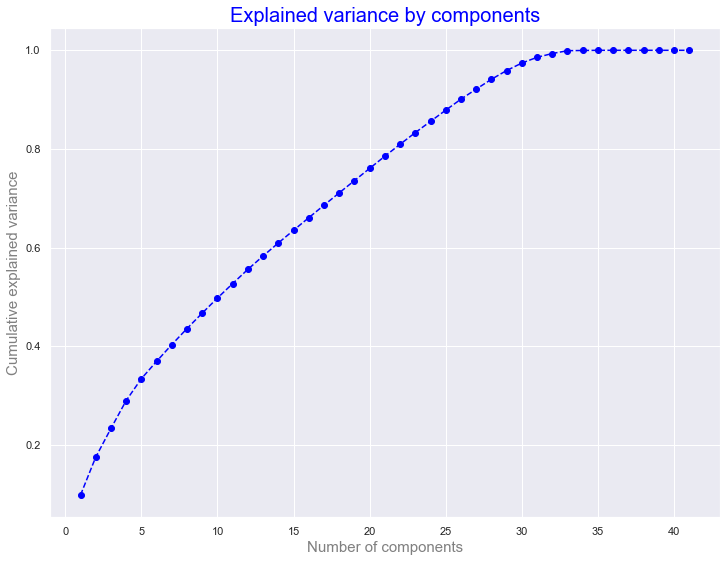

In [235]:
plt.figure(figsize=(12,9))
plt.plot(range(1,42),pca.explained_variance_ratio_.cumsum(),marker='o',linestyle='--',color='blue')
plt.title('Explained variance by components', color='blue',fontsize=20)
plt.xlabel('Number of components', color='grey',fontsize=15)
plt.ylabel('Cumulative explained variance', color='grey',fontsize=15)
plt.show()

But the crucial question is How many components to keep in our dimensional reduction?

***The rule of thumb is to keep at least 70 to 80 percent of the variance.***

In this case, we'll need 18 to 20 components on guidance with this rule

Let's use 3 components in this case...

In [236]:
pca=PCA(n_components=3)
pca.fit(dataset_std)

PCA(n_components=3)

In [237]:
pca.components_

array([[ 2.29419410e-01,  3.89391639e-01,  4.26736481e-01,
         2.02683070e-02,  1.00569148e-03, -9.66466990e-04,
         4.80064030e-03,  3.69293027e-01, -2.31880462e-01,
         1.58597002e-01, -3.36935275e-03, -6.91422131e-02,
        -6.16790638e-02, -5.76374800e-02,  3.45031208e-02,
        -8.99131244e-02,  1.78344123e-01,  3.65512800e-01,
        -4.49081831e-01, -1.93499997e-02,  1.37174931e-02,
        -1.66039108e-02, -1.35478088e-02,  1.21891574e-02,
        -7.16874376e-04, -1.24612264e-02,  1.27821685e-03,
        -7.33420212e-03, -3.47512784e-02, -1.69335222e-02,
         3.75330498e-03,  3.18565981e-03,  1.27183934e-03,
        -1.49165811e-02,  9.27696749e-03,  2.98039405e-02,
        -2.09470282e-02,  4.67730306e-02, -2.00776720e-02,
        -2.74654399e-02,  4.17798454e-02],
       [-1.50054784e-02, -2.93946457e-02, -3.27717353e-02,
         4.48774679e-02,  1.10739939e-01,  1.11473588e-01,
        -6.75951552e-02, -2.76318463e-02, -7.74532623e-03,
        -5.22

In [238]:
dataset_pca_comp=pd.DataFrame(data=pca.components_,
                             columns=dataset.columns.values,
                             index=['component 1','component 2','component 3'])
dataset_pca_comp

,QUANTITY\nORDERED,PRICEEACH,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCT\nCODE,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small,COUNTRY_Australia,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,TERRITORY_APAC,TERRITORY_EMEA,TERRITORY_N.Amer
component 1,0.229419,0.389392,0.426736,0.020268,0.001006,-0.000966,0.004801,0.369293,-0.231880,0.158597,-0.003369,-0.069142,-0.061679,-0.057637,0.034503,-0.089913,0.178344,0.365513,-0.449082,-0.019350,0.013717,-0.016604,-0.013548,0.012189,-0.000717,-0.012461,0.001278,-0.007334,-0.034751,-0.016934,0.003753,0.003186,0.001272,-0.014917,0.009277,0.029804,-0.020947,0.046773,-0.020078,-0.027465,0.041780
component 2,-0.015005,-0.029395,-0.032772,0.044877,0.110740,0.111474,-0.067595,-0.027632,-0.007745,-0.052238,0.052668,-0.016483,-0.028850,-0.012453,0.032665,0.031330,-0.009877,-0.024289,0.028933,-0.000049,-0.072861,-0.060123,0.083662,-0.078917,-0.102822,-0.189869,-0.069363,-0.042825,-0.095599,-0.011593,-0.075769,-0.003474,-0.000991,-0.201857,-0.060384,-0.064171,-0.106677,0.511348,-0.006332,-0.511464,0.530996
component 3,0.073831,-0.014774,0.047532,-0.052200,-0.533180,-0.531387,0.353082,-0.030142,0.025576,-0.092709,0.053086,0.063979,-0.021860,-0.004081,0.013908,0.022945,0.022289,0.000545,-0.010807,0.198163,-0.031178,0.016178,-0.010251,-0.059328,0.040399,0.005195,-0.093295,0.023195,-0.074344,0.188078,-0.125224,0.076727,0.101909,-0.028914,-0.091614,0.010516,-0.115020,0.000192,0.301764,-0.193927,-0.003094


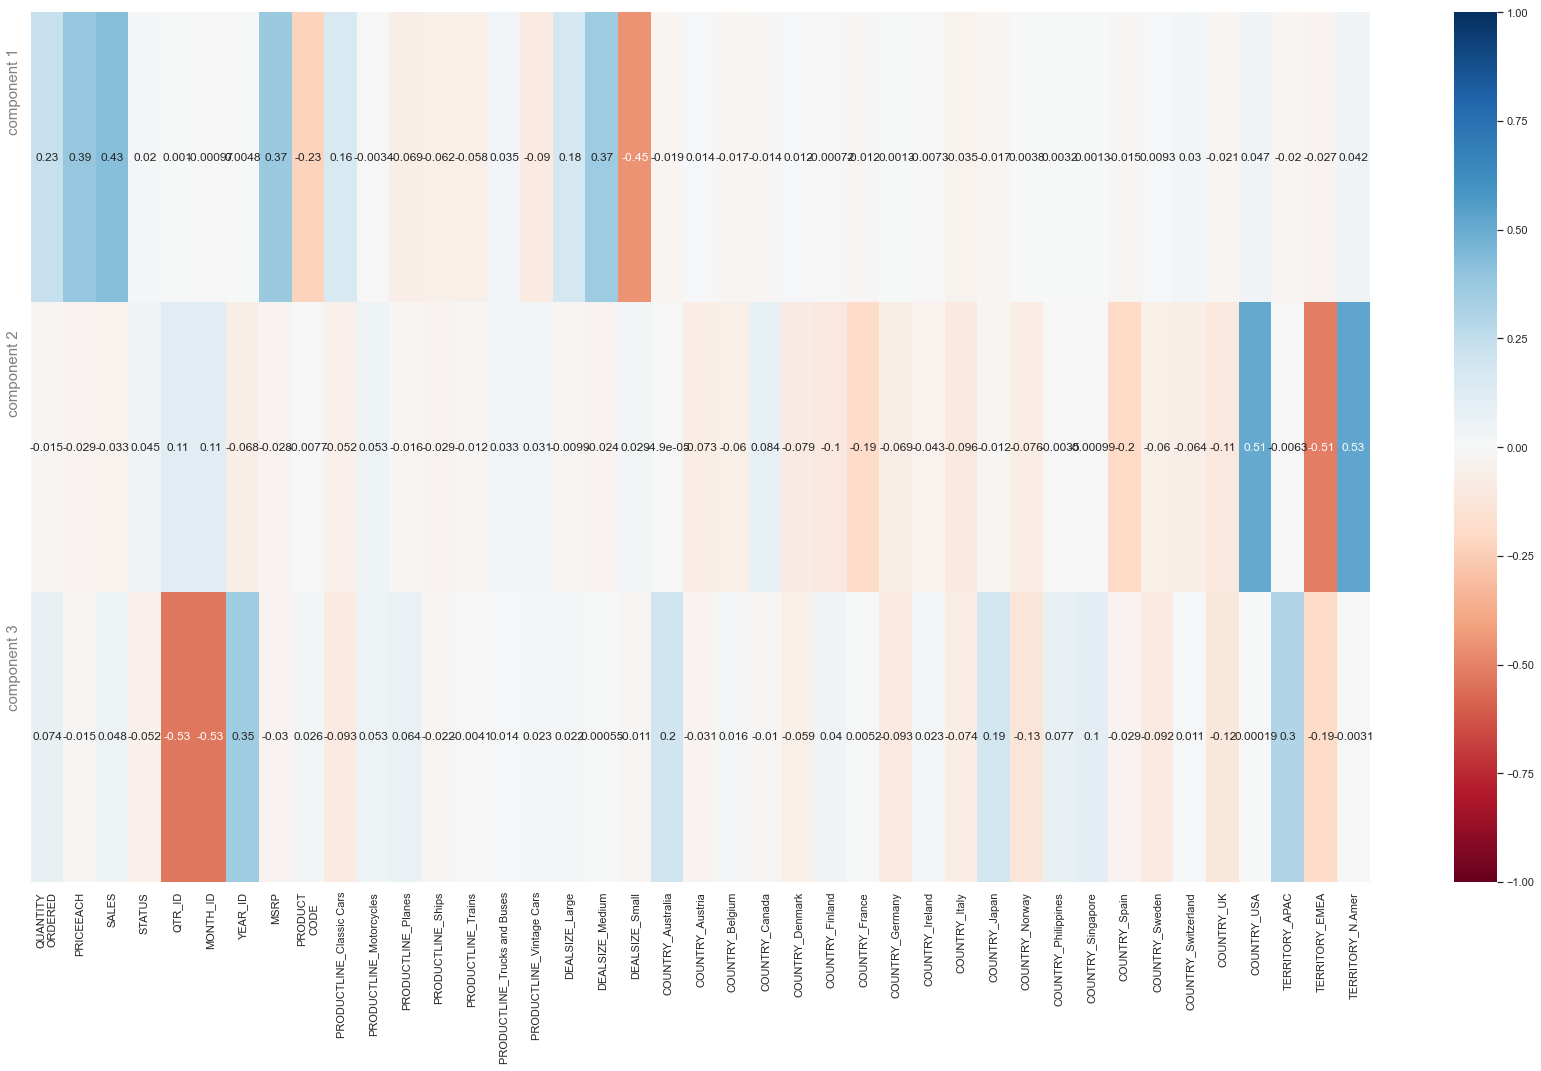

In [239]:
plt.figure(figsize=(30,16))
sns.heatmap(dataset_pca_comp,
           vmin=-1,
           vmax=1,
           cmap='RdBu',
           annot=True)
plt.yticks([0,1,2],['component 1          ','component 2        ','component 3         '],
          fontsize=15,
          color='grey',
          rotation = 90)
plt.show()

In [240]:
pca.transform(dataset_std)

array([[-0.33201777,  2.14527023,  1.24264464],
       [-0.83367744, -1.44209899,  0.03459502],
       [ 1.65488988, -1.45926766, -0.58491972],
       ...,
       [ 0.51287566, -2.42920295,  1.88322016],
       [-2.82305938, -2.00786332,  1.6377058 ],
       [-0.09481459,  1.94002567,  1.23637864]])

In [241]:
scores_pca=pca.transform(dataset_std)

In [242]:
wcss=[]
for i in range(1,11):
    kmeans_pca=KMeans(n_clusters=i,init='k-means++',random_state=42)
    kmeans_pca.fit(scores_pca)
    wcss.append(kmeans_pca.inertia_)

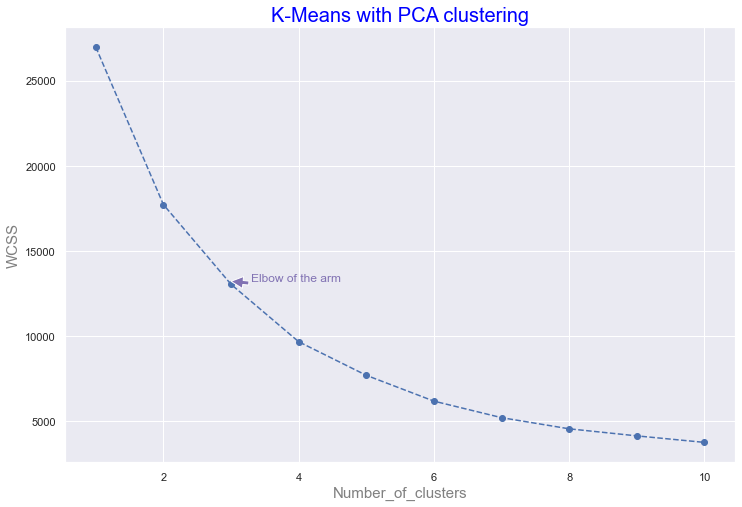

In [243]:
plt.figure(figsize=(12,8))
plt.plot(range(1,11),wcss,marker='o',linestyle='--')
plt.xlabel('Number_of_clusters', fontsize=15,color='grey')
plt.ylabel('WCSS', fontsize=15,color='grey')
plt.title('K-Means with PCA clustering', fontsize=20,color='blue')
plt.annotate('Elbow of the arm',xy=(3,13200),xytext=(3+0.3,13200.005),arrowprops=dict(facecolor='m'),color ='m')
plt.show()

We note that the decision we've made doesn't changed. we're still having 3 clusters even if there are differences between this and the previous plots.

The truth is out, we'll be working with 3 clusters.

In [244]:
kmeans_pca=KMeans(n_clusters=3,init='k-means++', random_state=42)
kmeans_pca.fit(dataset_std)

KMeans(n_clusters=3, random_state=42)

In [245]:
dataset_segm_pca_kmeans=pd.concat([dataset.reset_index(drop=True),pd.DataFrame(scores_pca)], axis=1)

In [246]:
dataset_segm_pca_kmeans.columns.values[-3:]=['Component 1','Component 2','Component 3'] # to label them
dataset_segm_pca_kmeans['Segment k-means PCA']=kmeans_pca.labels_ # to append the Segment k-means PCA label to our dataset.
dataset_segm_pca_kmeans

,QUANTITY\nORDERED,PRICEEACH,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCT\nCODE,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small,COUNTRY_Australia,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,TERRITORY_APAC,TERRITORY_EMEA,TERRITORY_N.Amer,Component 1,Component 2,Component 3,Segment k-means PCA
0,30,95.70,2871.00,1,1,2,2018,95,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,-0.332018,2.145270,1.242645,1
1,34,81.35,2765.90,1,2,5,2018,95,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.833677,-1.442099,0.034595,2
2,41,94.74,3884.34,1,3,7,2018,95,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.654890,-1.459268,-0.584920,0
3,45,83.26,3746.70,1,3,8,2018,95,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1.752420,2.374580,-0.332097,1
4,49,100.00,4900.00,1,4,10,2018,95,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2.615318,2.462815,-0.998104,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2818,20,100.00,2000.00,1,4,12,2019,54,108,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,-2.481538,-1.405575,-1.747953,2
2819,29,100.00,2900.00,1,1,1,2020,54,108,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.240042,-2.221309,2.130342,0
2820,43,100.00,4300.00,0,1,3,2020,54,108,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0.512876,-2.429203,1.883220,0
2821,34,62.24,2116.16,1,1,3,2020,54,108,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-2.823059,-2.007863,1.637706,2


To gain some insight, we calculate the mean value of each feature by cluster, using groupby method

In [247]:
dataset_segm_pca_kmeans_freq=dataset_segm_pca_kmeans.groupby(['Segment k-means PCA']).mean()
dataset_segm_pca_kmeans_freq

,QUANTITY\nORDERED,PRICEEACH,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCT\nCODE,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small,COUNTRY_Australia,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,TERRITORY_APAC,TERRITORY_EMEA,TERRITORY_N.Amer,Component 1,Component 2,Component 3
Segment k-means PCA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,38.886291,95.792593,3697.658353,1.000000,2.633369,6.825717,2018.819341,120.550478,46.599362,0.424017,0.094580,0.093518,0.075452,0.020191,0.121148,0.171095,0.097768,0.899044,0.003188,0.099894,0.035069,0.015940,0.000000,0.039320,0.055260,0.180659,0.036132,0.008502,0.054198,0.025505,0.049947,0.015940,0.044633,0.199787,0.036132,0.023379,0.079702,0.000000,0.185972,0.814028,0.0,1.541698,-1.446514,0.034804
1,35.337058,83.907542,2960.828259,1.032588,2.811918,7.378957,2018.804469,101.005587,53.202980,0.319367,0.139665,0.097765,0.078212,0.023277,0.119181,0.222533,0.060521,0.500931,0.438547,0.000000,0.000000,0.000000,0.065177,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.934823,0.000000,0.000000,1.0,0.213936,2.137095,-0.009429
2,30.350248,69.196213,2019.134567,0.993812,2.690594,7.022277,2018.824257,77.230198,62.886139,0.278465,0.113861,0.139851,0.097772,0.040842,0.073020,0.256188,0.000000,0.000000,1.000000,0.112624,0.027228,0.022277,0.000000,0.032178,0.049505,0.178218,0.034653,0.009901,0.076733,0.034653,0.047030,0.013614,0.045792,0.190594,0.028465,0.011139,0.085396,0.000000,0.206683,0.793317,0.0,-2.079833,-1.156027,-0.028000


In [248]:
dataset_segm_pca_kmeans_freq['Num_Customers']=dataset_segm_pca_kmeans[['Segment k-means PCA','PRODUCT\nCODE']].groupby(['Segment k-means PCA']).count()
dataset_segm_pca_kmeans_freq['PCT_Customers']=dataset_segm_pca_kmeans_freq['Num_Customers']/dataset_segm_pca_kmeans_freq['Num_Customers'].sum()
dataset_segm_pca_kmeans_freq=dataset_segm_pca_kmeans_freq.rename({0: 'High_contributor',
                                                                  1: 'Middle_contributor',
                                                                  2: 'Low_contributor'})
                                                                  
dataset_segm_pca_kmeans_freq

,QUANTITY\nORDERED,PRICEEACH,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCT\nCODE,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small,COUNTRY_Australia,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,TERRITORY_APAC,TERRITORY_EMEA,TERRITORY_N.Amer,Component 1,Component 2,Component 3,Num_Customers,PCT_Customers
Segment k-means PCA,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
High_contributor,38.886291,95.792593,3697.658353,1.000000,2.633369,6.825717,2018.819341,120.550478,46.599362,0.424017,0.094580,0.093518,0.075452,0.020191,0.121148,0.171095,0.097768,0.899044,0.003188,0.099894,0.035069,0.015940,0.000000,0.039320,0.055260,0.180659,0.036132,0.008502,0.054198,0.025505,0.049947,0.015940,0.044633,0.199787,0.036132,0.023379,0.079702,0.000000,0.185972,0.814028,0.0,1.541698,-1.446514,0.034804,941,0.333333
Middle_contributor,35.337058,83.907542,2960.828259,1.032588,2.811918,7.378957,2018.804469,101.005587,53.202980,0.319367,0.139665,0.097765,0.078212,0.023277,0.119181,0.222533,0.060521,0.500931,0.438547,0.000000,0.000000,0.000000,0.065177,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.934823,0.000000,0.000000,1.0,0.213936,2.137095,-0.009429,1074,0.380446
Low_contributor,30.350248,69.196213,2019.134567,0.993812,2.690594,7.022277,2018.824257,77.230198,62.886139,0.278465,0.113861,0.139851,0.097772,0.040842,0.073020,0.256188,0.000000,0.000000,1.000000,0.112624,0.027228,0.022277,0.000000,0.032178,0.049505,0.178218,0.034653,0.009901,0.076733,0.034653,0.047030,0.013614,0.045792,0.190594,0.028465,0.011139,0.085396,0.000000,0.206683,0.793317,0.0,-2.079833,-1.156027,-0.028000,808,0.286220


Let's analyze the results

The larger segment (in terms of number of customers) is Middle_contributor segment, followed by the High_contributor, then Low_contributor segments

Now, let's visualize our clusters on 2D dimension plan

To do so, we'll use two out of our 3 components and use them as axis on the visualization chart. We absolutely sure, based on our rule of thumb, that the first 2 component explains the more the variance of our observations than the 3rd one.

Before that, let's add the name of the segments to the label as we did before and map the 3 clusters directly inside it.

In [249]:
dataset_segm_pca_kmeans['Legends']=dataset_segm_pca_kmeans['Segment k-means PCA'].map({0: 'High contributor',
                                                                  1: 'Middle contributor',
                                                                  2: 'Low contributor'})
                                                                  
dataset_segm_pca_kmeans.head()

,QUANTITY\nORDERED,PRICEEACH,SALES,STATUS,QTR_ID,MONTH_ID,YEAR_ID,MSRP,PRODUCT\nCODE,PRODUCTLINE_Classic Cars,PRODUCTLINE_Motorcycles,PRODUCTLINE_Planes,PRODUCTLINE_Ships,PRODUCTLINE_Trains,PRODUCTLINE_Trucks and Buses,PRODUCTLINE_Vintage Cars,DEALSIZE_Large,DEALSIZE_Medium,DEALSIZE_Small,COUNTRY_Australia,COUNTRY_Austria,COUNTRY_Belgium,COUNTRY_Canada,COUNTRY_Denmark,COUNTRY_Finland,COUNTRY_France,COUNTRY_Germany,COUNTRY_Ireland,COUNTRY_Italy,COUNTRY_Japan,COUNTRY_Norway,COUNTRY_Philippines,COUNTRY_Singapore,COUNTRY_Spain,COUNTRY_Sweden,COUNTRY_Switzerland,COUNTRY_UK,COUNTRY_USA,TERRITORY_APAC,TERRITORY_EMEA,TERRITORY_N.Amer,Component 1,Component 2,Component 3,Segment k-means PCA,Legends
0,30,95.70,2871.00,1,1,2,2018,95,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,-0.332018,2.145270,1.242645,1,Middle contributor
1,34,81.35,2765.90,1,2,5,2018,95,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,-0.833677,-1.442099,0.034595,2,Low contributor
2,41,94.74,3884.34,1,3,7,2018,95,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.654890,-1.459268,-0.584920,0,High contributor
3,45,83.26,3746.70,1,3,8,2018,95,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1.752420,2.374580,-0.332097,1,Middle contributor
4,49,100.00,4900.00,1,4,10,2018,95,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,2.615318,2.462815,-0.998104,1,Middle contributor


Now we can plot the data

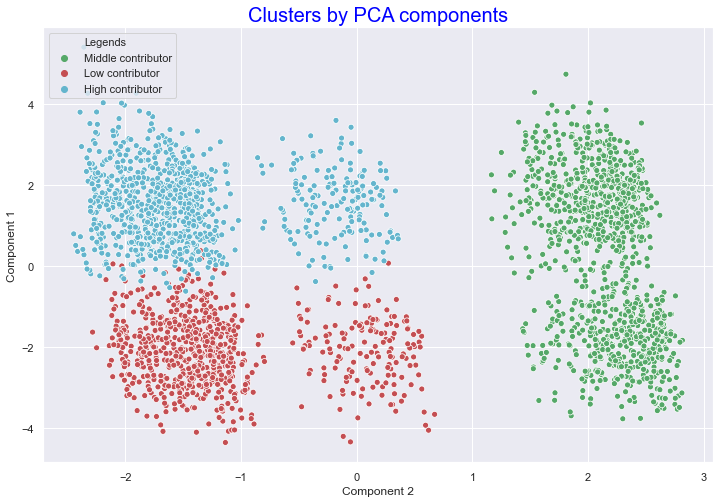

In [250]:
x_axis=dataset_segm_pca_kmeans['Component 2'] # the one related to the middle contributor
y_axis=dataset_segm_pca_kmeans['Component 1'] # the the one related to the high contributor
plt.figure(figsize=(12,8))
sns.scatterplot(x_axis,y_axis,hue=dataset_segm_pca_kmeans['Legends'],palette=['g','r','c'])
plt.title('Clusters by PCA components', fontsize=20, color='blue')
plt.legend(loc='upper left')
plt.show()

We can now observe the separate segments, this haven't been possible plotting without PCA and this was the purpose of this process, reducing the number of variables by combining them into bigger more meanigful features.
They are orthogonl to each other, this means the difference between 2 components is as big as possible.

There is some overlap between thr red and blue segment, but holistically, all 3 segments are clearly separated.